Latest notebook since December 2024
- changes were made to preprocessing.py
In this notebook:
    -data processing
    -data pairing
    -data vis

Script was cleaned on Dec. 18th 2024 by CVR

Part Ia. Loading all relevant packages

In [1]:
#Chunk that sloads necessary packages & sets working environment to where the jupyterlab notebook file is 
%load_ext autoreload
%autoreload 2
import gnssvod as gv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pdb
import importlib
import zipfile
import os
import xarray as xr
import glob
import shutil
from gnssvod.hemistats.hemistats import hemibuild
#import georinex as gr
#import qgrid as interactive table 
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
import shutil
from scipy.signal import correlate

from matplotlib import rcParams
from datetime import datetime, timedelta
import seaborn as sns



Part Ib. Batch Processing and Pairing- SNR

In [ ]:
#batch processing
pattern= {'MACROCOSM-2':'/data_demo/extracted/MACROCOSM-2/MACROCOSM-2*.23O'}
outputdir={'MACROCOSM-2':'extracted/MACROCOSM-2/MACROCOSM-2/nc/', }
keepvars=['S1C','S1X','S2C','S2X']
gv.preprocess(pattern,interval='15S',keepvars=keepvars,outputdir=outputdir)

In [ ]:
#batch processing for one station
pattern= {'MACROCOSM-5':'data_demo/extracted/MACROCOSM-5/MACROCOSM-5*.23O'}
outputdir={'MACROCOSM-5':'extracted/MACROCOSM-5/MACROCOSM-5/nc/', }
keepvars=['S1C','S1X','S2C','S2X']
gv.preprocess(pattern,interval='15S',keepvars=keepvars,outputdir=outputdir)

In [2]:
#data for each receiver
#setting pattern for processed data

pattern={'MACROCOSM-5':'/Volumes/coraldelmar/GNSSDat.2/data_demo/extracted/MACROCOSM-5/paired_4/*.nc',
         'MACROCOSM-2':'/Volumes/coraldelmar/GNSSDat.2/data_demo/extracted/MACROCOSM-2/paired_4/*.nc'}

In [3]:
#setting time intervals as pd.to_datetime

startday = start=pd.to_datetime('01-03-2024',format='%d-%m-%Y')
timeintervals=pd.interval_range(start=startday, periods=365, freq='D', closed='left')
timeintervals

#end date can be added, if you want to pair specific dates-- see below
'''
startday = pd.to_datetime('01-10-2023', format='%d-%m-%Y')
endday = pd.to_datetime('31-10-2023', format='%d-%m-%Y')  
dates = pd.date_range(start=startday, end=endday, freq='D')
timeintervals = pd.interval_range(start=dates[0], end=dates[-1], freq='D', closed='left')

#
print(timeintervals)
'''

"\nstartday = pd.to_datetime('01-10-2023', format='%d-%m-%Y')\nendday = pd.to_datetime('31-10-2023', format='%d-%m-%Y')  \ndates = pd.date_range(start=startday, end=endday, freq='D')\ntimeintervals = pd.interval_range(start=dates[0], end=dates[-1], freq='D', closed='left')\n\n#\nprint(timeintervals)\n"

In [4]:

#setting range of October dates 
#
startday = pd.to_datetime('03-01-2024', format='%d-%m-%Y')
endday = pd.to_datetime('14-05-2024', format='%d-%m-%Y') 
dates = pd.date_range(start=startday, end=endday, freq='D')
timeintervals = pd.interval_range(start=dates[0], end=dates[-1], freq='D', closed='left')
print(timeintervals)

IntervalIndex([[2024-01-03 00:00:00, 2024-01-04 00:00:00),
               [2024-01-04 00:00:00, 2024-01-05 00:00:00),
               [2024-01-05 00:00:00, 2024-01-06 00:00:00),
               [2024-01-06 00:00:00, 2024-01-07 00:00:00),
               [2024-01-07 00:00:00, 2024-01-08 00:00:00),
               [2024-01-08 00:00:00, 2024-01-09 00:00:00),
               [2024-01-09 00:00:00, 2024-01-10 00:00:00),
               [2024-01-10 00:00:00, 2024-01-11 00:00:00),
               [2024-01-11 00:00:00, 2024-01-12 00:00:00),
               [2024-01-12 00:00:00, 2024-01-13 00:00:00),
               ...
               [2024-05-04 00:00:00, 2024-05-05 00:00:00),
               [2024-05-05 00:00:00, 2024-05-06 00:00:00),
               [2024-05-06 00:00:00, 2024-05-07 00:00:00),
               [2024-05-07 00:00:00, 2024-05-08 00:00:00),
               [2024-05-08 00:00:00, 2024-05-09 00:00:00),
               [2024-05-09 00:00:00, 2024-05-10 00:00:00),
               [2024-05-10 00:00:00, 

In [6]:
#pairing reference and subcanopy station 
#subcanopy is MAC2, reference is MAC 5

pairings={'MACROCOSM':('MACROCOSM-5','MACROCOSM-2')}
outputdir={'MACROCOSM':'/Volumes/coraldelmar/GNSSDat.2/data_demo/paired_4/'}
keepvars=['S1','S2','Azimuth','Elevation']
out=gv.gather_stations(pattern,pairings,timeintervals,keepvars=None,outputdir=outputdir)

Processing MACROCOSM
Listing the files matching with the interval
Could not find any files matching the pattern /Volumes/coraldelmar/GNSSDat.2/data_demo/extracted/MACROCOSM-5/paired_4/*.nc
Could not find any files matching the pattern /Volumes/coraldelmar/GNSSDat.2/data_demo/extracted/MACROCOSM-2/paired_4/*.nc
Found 0 files for MACROCOSM-5
Reading


ValueError: No objects to concatenate

In [7]:
out['MACROCOSM'][0][1]

NameError: name 'out' is not defined

In [5]:
ds=xr.open_mfdataset('/Volumes/coraldelmar/GNSSDat.2/data_demo/paired_4/*.nc', combine='nested',concat_dim="Epoch")
ds

<xarray.Dataset> Size: 1GB
Dimensions:    (Station: 2, Epoch: 115376, SV: 105)
Coordinates:
  * Station    (Station) <U11 88B 'MACROCOSM-2' 'MACROCOSM-5'
  * SV         (SV) <U3 1kB 'C11' 'C12' 'C14' 'C19' ... 'R23' 'R24' 'R25' 'R26'
  * Epoch      (Epoch) datetime64[ns] 923kB 2024-01-02T18:08:15 ... 2024-05-1...
Data variables:
    S1C        (Station, Epoch, SV) float64 194MB dask.array<chunksize=(1, 1407, 39), meta=np.ndarray>
    S1X        (Station, Epoch, SV) float64 194MB dask.array<chunksize=(1, 1407, 39), meta=np.ndarray>
    S2C        (Station, Epoch, SV) float64 194MB dask.array<chunksize=(1, 1407, 39), meta=np.ndarray>
    S2X        (Station, Epoch, SV) float64 194MB dask.array<chunksize=(1, 1407, 39), meta=np.ndarray>
    Azimuth    (Station, Epoch, SV) float64 194MB dask.array<chunksize=(1, 1407, 39), meta=np.ndarray>
    Elevation  (Station, Epoch, SV) float64 194MB dask.array<chunksize=(1, 1407, 39), meta=np.ndarray>

In [7]:
df=ds.to_dataframe().dropna(how='all').reorder_levels(["Station", "Epoch", "SV"]).sort_index()
df

S1C   S1X   S2C   S2X  Azimuth  \
Station     Epoch               SV                                     
MACROCOSM-2 2024-01-02 18:08:15 E07   NaN  38.7   NaN   NaN    172.4   
                                G04  42.7   NaN   NaN  32.7    -53.3   
                                G08  39.7   NaN   NaN  22.0   -154.8   
                                G09  35.0   NaN   NaN  28.0    -40.8   
                                G16  37.3   NaN   NaN   NaN      1.2   
...                                   ...   ...   ...   ...      ...   
MACROCOSM-5 2024-05-13 03:30:00 R11  34.5   NaN  28.9   NaN     29.2   
                                R12  47.1   NaN  42.0   NaN     70.2   
                                R13  37.0   NaN  36.1   NaN   -167.5   
                                R17  37.0   NaN  28.0   NaN    -91.9   
                                R18   NaN   NaN  25.9   NaN    -48.6   

                                     Elevation  
Station     Epoch               SV              
MACROCOSM-2 2024-01-02 18:08:15 E07       56.9  
                                G04       52.8  
                                G08       43.1  
                                G09       16.5  
                                G16       48.2  
...                                        ...  
MACROCOSM-5 2024-05-13 03:30:00 R11       18.6  
                                R12       75.0  
                                R13       47.8  
                                R17       14.6  
                                R18        2.5  

[3304817 rows x 6 columns]

Part  Ic. SNR Vis
-> here I am looking for other ways to visualize and better streamline the process

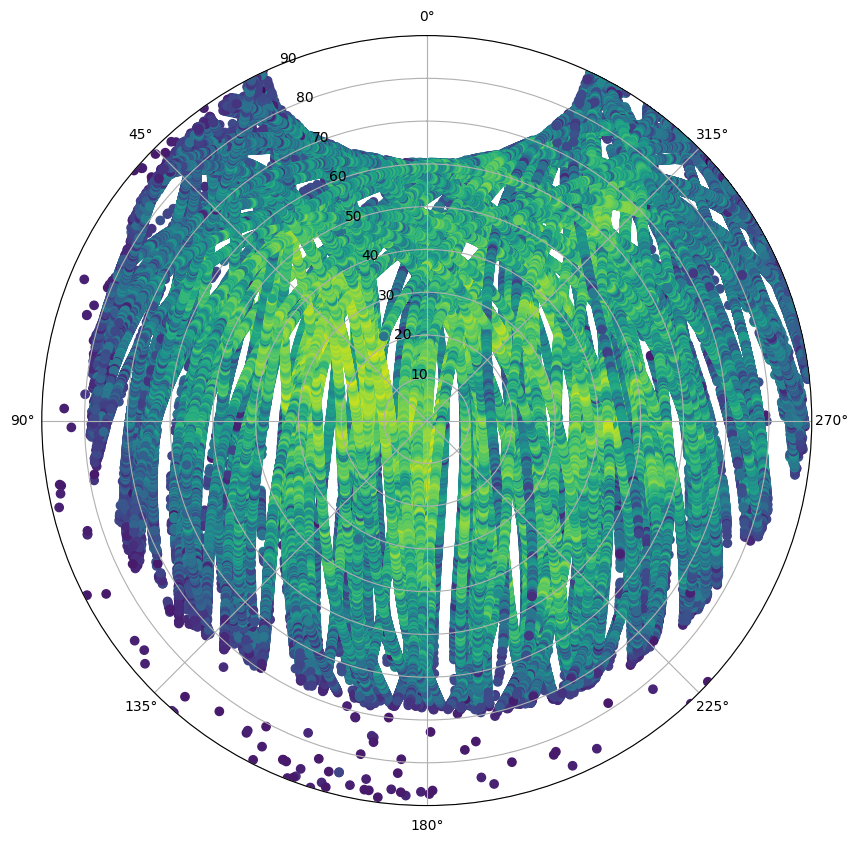

In [10]:
mySV='G10'
mystation_name='MACROCOSM-2'
fig, ax=plt.subplots(figsize=(10,10),subplot_kw=dict(projection='polar'))
subdf=df.xs(mystation_name,level='Station')

radius=90-subdf.Elevation
theta=np.deg2rad(subdf.Azimuth)

hs=ax.scatter(theta,radius,c=subdf.S1C)
ax.set_rlim([0,90])
ax.set_theta_zero_location("N")

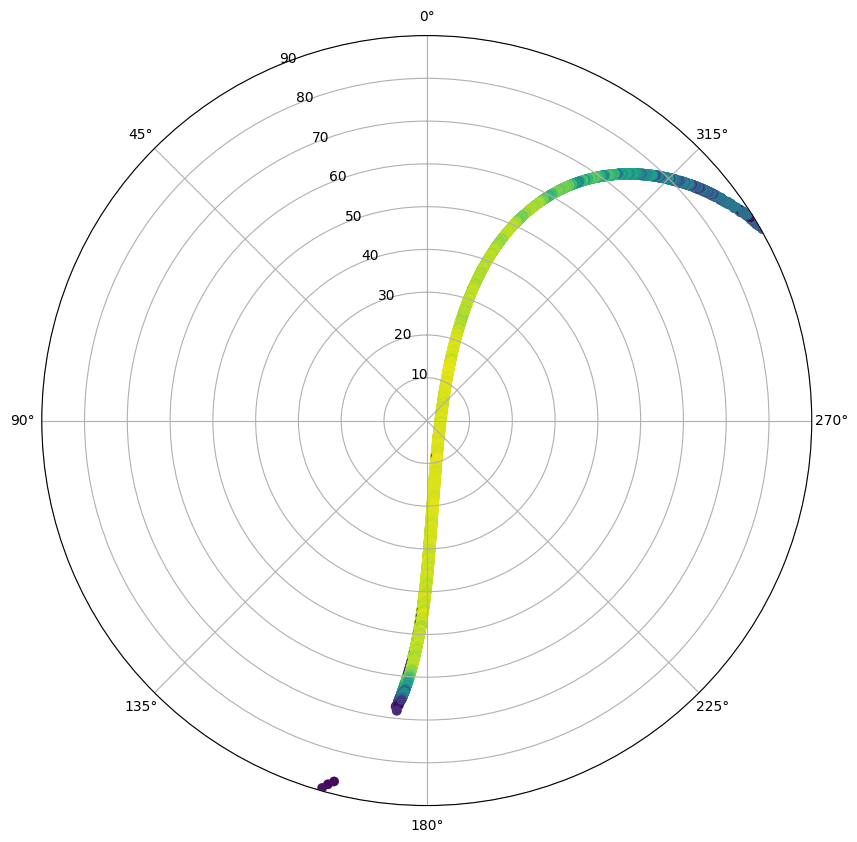

In [10]:
mySV='G10'
mystation_name='MACROCOSM-5'
fig, ax=plt.subplots(figsize=(10,10),subplot_kw=dict(projection='polar'))
subdf=df.xs(mySV,level='SV').xs(mystation_name,level='Station')

radius=90-subdf.Elevation
theta=np.deg2rad(subdf.Azimuth)

hs=ax.scatter(theta,radius,c=subdf.S1C)
ax.set_rlim([0,90])
ax.set_theta_zero_location("N")


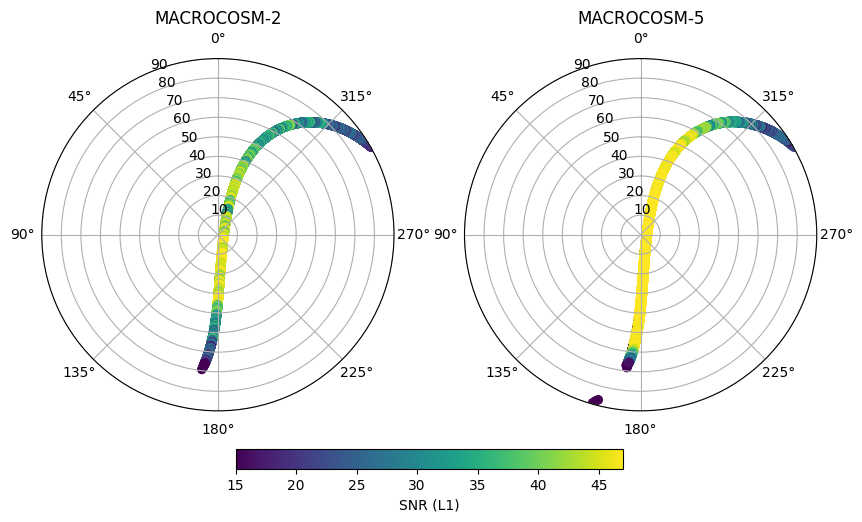

In [11]:
mySV='G10'
station_names=df.index.get_level_values('Station').unique()
clim=[15,47]
fig,ax=plt.subplots(1,len(station_names),figsize=(10,10),subplot_kw=dict(projection='polar'))
for i, iname in enumerate (station_names):
    subdf=df.xs(mySV,level='SV').xs(iname, level='Station')
    radius=90-subdf.Elevation
    theta=np.deg2rad(subdf.Azimuth)
    hs=ax[i].scatter(theta,radius,c=subdf.S1C)
    hs.set_clim(clim)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)
plt.colorbar(hs,ax=ax, location='bottom',shrink=.5,pad=0.05,label='SNR (L1)')

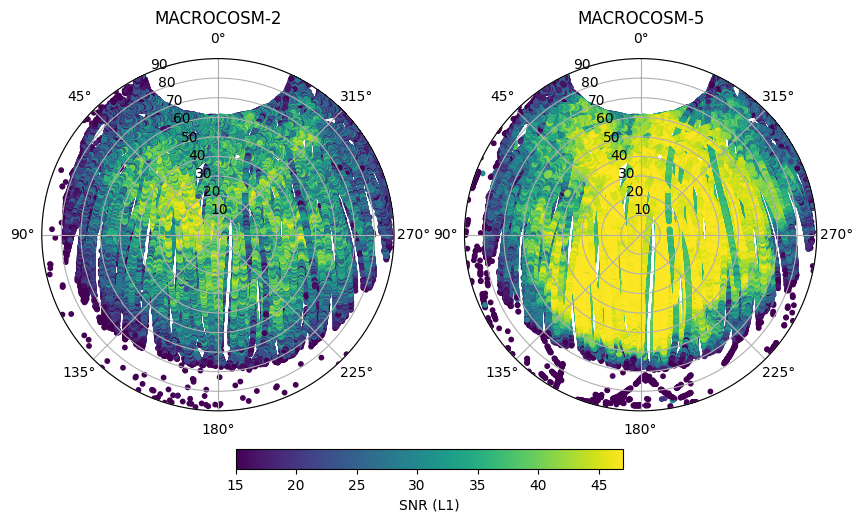

In [8]:

station_names=df.index.get_level_values('Station').unique()
clim=[15,47]
fig,ax=plt.subplots(1,len(station_names),figsize=(10,10),subplot_kw=dict(projection='polar'))
for i, iname in enumerate (station_names):
    subdf=df.xs(iname, level='Station')
    radius=90-subdf.Elevation
    theta=np.deg2rad(subdf.Azimuth)
    hs=ax[i].scatter(theta,radius,c=subdf.S1C,s=10)
    hs.set_clim(clim)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)
plt.colorbar(hs,ax=ax, location='bottom',shrink=.5,pad=0.05,label='SNR (L1)')

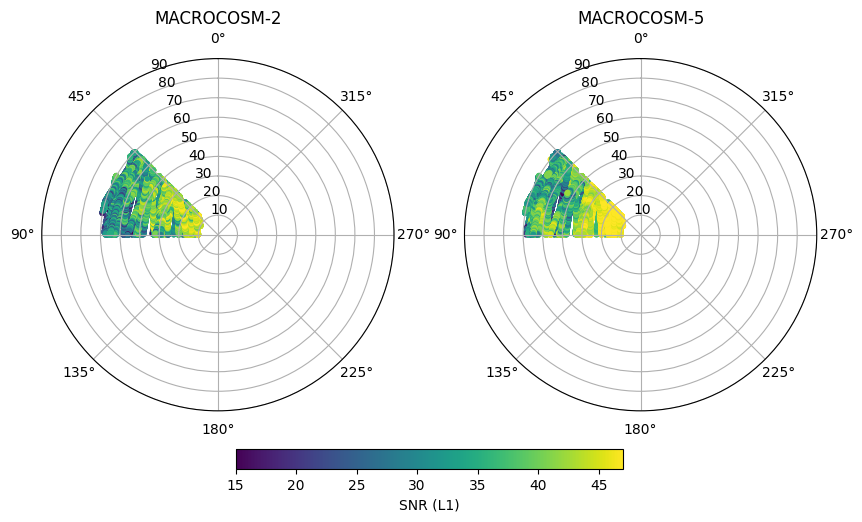

In [9]:
#masking for area with high SNR
station_names = df.index.get_level_values('Station').unique()
clim = [15, 47]

fig, ax = plt.subplots(1, len(station_names), figsize=(10, 10), subplot_kw=dict(projection='polar'))

for i, iname in enumerate(station_names):
    subdf = df.xs(iname, level='Station')
    radius = 90 - subdf.Elevation
    theta = np.deg2rad(subdf.Azimuth)
    
    # filtering the data for radial (10-30) and angular (45°-90°) ranges
    mask = (radius >= 10) & (radius <= 60) & (theta >= np.deg2rad(45)) & (theta <= np.deg2rad(90))
    filtered_radius = radius[mask]
    filtered_theta = theta[mask]
    filtered_S1C = subdf.S1C[mask]
    
    # 
    hs = ax[i].scatter(filtered_theta, filtered_radius, c=filtered_S1C, s=10)
    hs.set_clim(clim)
    ax[i].set_rlim([0, 90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

# 
plt.colorbar(hs, ax=ax, location='bottom', shrink=.5, pad=0.05, label='SNR (L1)')

Part II. VOD set up & Vis

In [8]:
#calculating VOD
pattern='/Volumes/coraldelmar/GNSSDat.2/data_demo/paired_02/*.nc'
pairings={'MACROCOSM':('MACROCOSM-5','MACROCOSM-2')}
bands={'VOD1':['S1','S1X','S1C'],'VOD2':['S2','S2X','S2C']}

vod=gv.calc_vod(pattern,pairings,bands)
vod=vod['MACROCOSM']

vod

VOD1      VOD2  Azimuth  Elevation
Epoch               SV                                         
2024-01-10 14:17:15 C20       NaN       NaN    -34.7       47.4
                    C32       NaN       NaN    139.6       72.3
                    C37       NaN       NaN    -10.6       59.5
                    E05  0.665283       NaN    -27.2       35.3
                    E09  1.305367       NaN     54.3       59.2
...                           ...       ...      ...        ...
2023-12-07 12:46:30 R12  0.407132       NaN     34.8       12.3
                    R13  0.034007 -0.136029     71.3       47.6
                    R14  2.926926  1.779689    162.1       39.7
                    R18  2.508438  1.361723   -105.0       38.5
                    R19  1.452883       NaN    -54.9       24.7

[1912855 rows x 4 columns]

In [9]:
#calculating avg vod

hemi = gv.hemibuild(2)
# get patches for plotting later
patches = hemi.patches()
# classify vod into grid cells, drop azimuth and elevation afterwards as we don't need it anymore
vod = hemi.add_CellID(vod)
# get average value per grid cell
vod_avg = vod.groupby(['CellID']).agg(['mean', 'std', 'count'])
# flatten the columns
vod_avg.columns = ["_".join(x) for x in vod_avg.columns.to_flat_index()]
vod_avg

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gnssvod/hemistats/hemistats.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idf=idf.groupby('eleind',group_keys=False).apply(azicut) # groupby will drop rows with eleind=NaN
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gnssvod/hemistats/hemistats.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iele = idf.eleind[0]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gnssvod/hemistats/hemistats.py:80: FutureWarning: Series.__getitem__ treating keys as positions is 

VOD1_mean  VOD1_std  VOD1_count  VOD2_mean  VOD2_std  VOD2_count  \
CellID                                                                     
0        1.302682  0.799570         102   2.302441  0.521880          54   
1        0.836381  0.647421         126   1.693059  0.693934          39   
2        1.082042  0.595903         263   1.736755  0.406908         184   
3        0.933414  0.419894         265   1.437846  0.432891         189   
4        0.670585  0.429096         108   1.772861  0.754333          34   
...           ...       ...         ...        ...       ...         ...   
6427          NaN       NaN           0  -0.012051       NaN           1   
6428    -0.008681  0.042491         107   0.010464  0.027344           9   
6429     0.010493  0.048376         373   0.014844  0.047736          15   
6430     0.015421  0.048282         112  -0.006091  0.037498           7   
6431     0.018236  0.051866         176   0.007228  0.024232           8   

        Azimuth_mean  Azimuth_std  Azimuth_count  Elevation_mean  \
CellID                                                             
0         -32.836607    98.258420            112       89.366964   
1          28.216981    12.870023            159       87.727044   
2          68.028739    12.892191            341       87.746921   
3         111.161607    12.800750            336       87.739286   
4         149.273600     9.699037            125       87.768000   
...              ...          ...            ...             ...   
6427      -31.933333     0.115470              3        2.933333   
6428      -30.141176     0.227146            119        2.036975   
6429      -29.107828     0.442278            396        2.131566   
6430      -27.598333     0.465442            120        2.098333   
6431      -26.133684     0.380646            190        2.115789   

        Elevation_std  Elevation_count  
CellID                                  
0            0.231870              112  
1            0.521886              159  
2            0.506224              341  
3            0.521884              336  
4            0.506028              125  
...               ...              ...  
6427         0.115470                3  
6428         0.582930              119  
6429         0.579164              396  
6430         0.582083              120  
6431         0.532800              190  

[5127 rows x 12 columns]

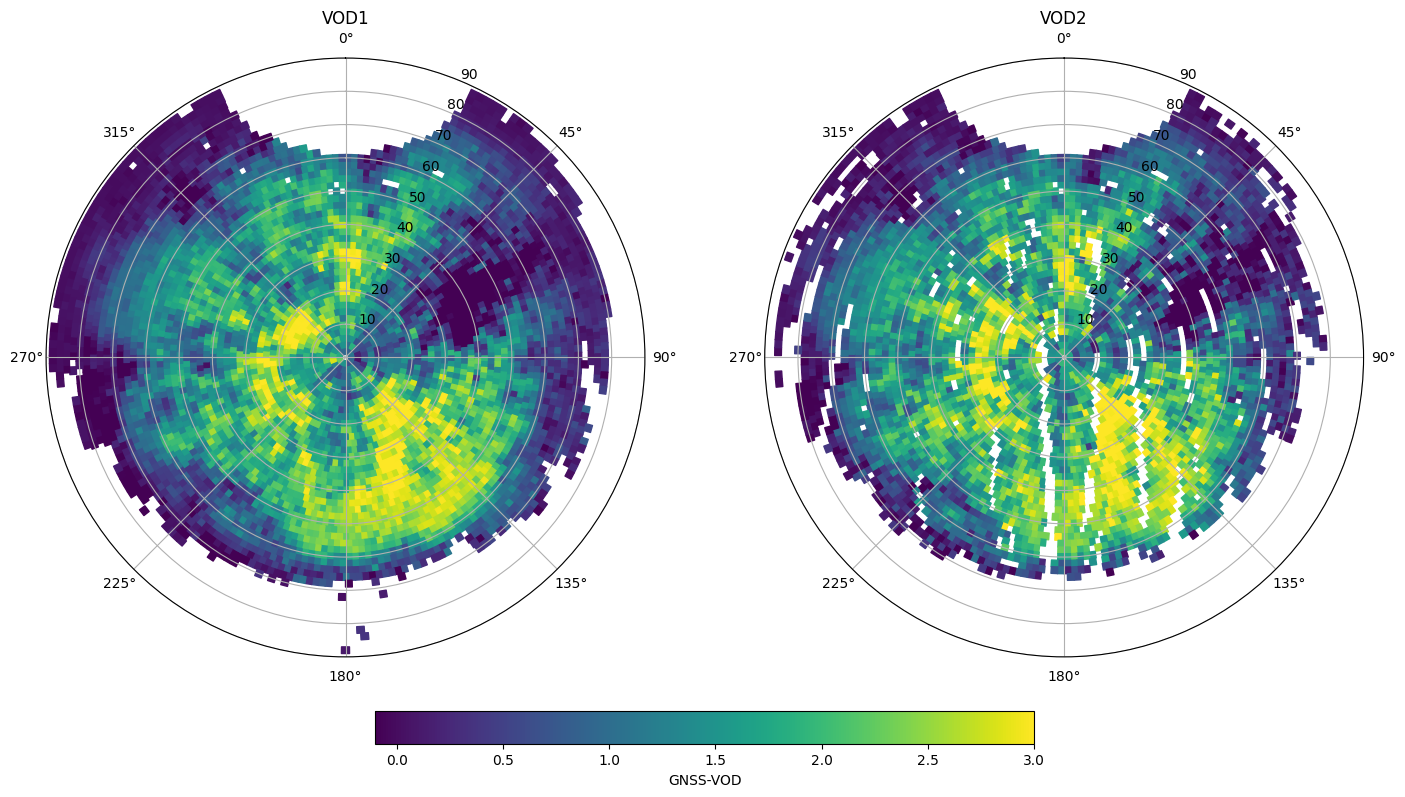

In [14]:
#patchy VOD
fig, ax = plt.subplots(1,2,figsize=(17,14),subplot_kw=dict(projection='polar'))

vod_names = ['VOD1','VOD2']
for i, iname in enumerate(vod_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,vod_avg[f"{iname}_mean"]],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches[f"{iname}_mean"],edgecolor='face', linewidth=1)
    pc.set_clim([-0.1,3])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_theta_direction(-1)
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='GNSS-VOD')

Data for VOD1 after filtering: 4475 points
VOD1 - Low values: 1119
VOD1 - Medium values: 2237
VOD1 - High values: 1119
Data for VOD2 after filtering: 2872 points
VOD2 - Low values: 718
VOD2 - Medium values: 1436
VOD2 - High values: 718


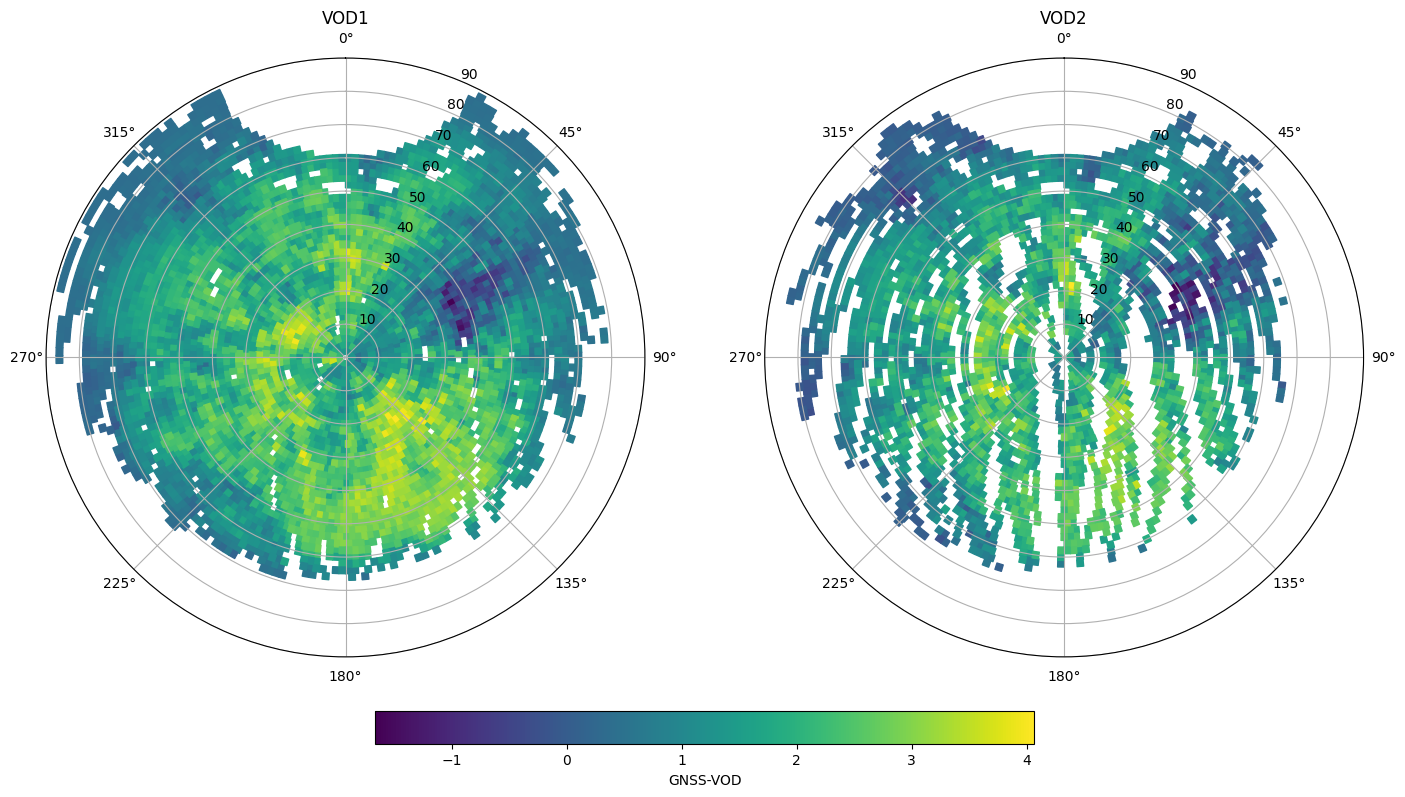

In [13]:
#patchy vod set as low, medium, and high 

vod_names = ['VOD1', 'VOD2']
fig, ax = plt.subplots(1, 2, figsize=(17, 14), subplot_kw=dict(projection='polar'))
 
cmap = plt.cm.viridis   

for i, iname in enumerate(vod_names):
    ivod_data = vod_avg[f"{iname}_mean"].where(vod_avg[f"{iname}_count"] > 40)
    
 
    print(f"Data for {iname} after filtering: {ivod_data.dropna().shape[0]} points")
    
    if ivod_data.dropna().shape[0] == 0:
        print(f"No valid data to plot for {iname}, skipping...")
        continue
    
    # by percentile of vod
    low_threshold = np.percentile(ivod_data.dropna(), 25)
    high_threshold = np.percentile(ivod_data.dropna(), 75)
    
    #class.values into low, med, and high VOD
    low_values = ivod_data.where(ivod_data <= low_threshold).dropna()
    medium_values = ivod_data.where((ivod_data > low_threshold) & (ivod_data <= high_threshold)).dropna()
    high_values = ivod_data.where(ivod_data > high_threshold).dropna()
    
    # 
    print(f"{iname} - Low values: {low_values.shape[0]}")
    print(f"{iname} - Medium values: {medium_values.shape[0]}")
    print(f"{iname} - High values: {high_values.shape[0]}")
    
    #  
    ipatches_low = pd.concat([patches, low_values], join='inner', axis=1)
    ipatches_medium = pd.concat([patches, medium_values], join='inner', axis=1)
    ipatches_high = pd.concat([patches, high_values], join='inner', axis=1)

    #  
    pc_low = PatchCollection(ipatches_low.Patches, array=ipatches_low[f"{iname}_mean"], edgecolor='face', linewidth=1, cmap=cmap)
    pc_medium = PatchCollection(ipatches_medium.Patches, array=ipatches_medium[f"{iname}_mean"], edgecolor='face', linewidth=1, cmap=cmap)
    pc_high = PatchCollection(ipatches_high.Patches, array=ipatches_high[f"{iname}_mean"], edgecolor='face', linewidth=1, cmap=cmap)
    
    #  
    all_values = np.concatenate([low_values.values, medium_values.values, high_values.values])
    pc_low.set_clim([np.min(all_values), np.max(all_values)])
    pc_medium.set_clim([np.min(all_values), np.max(all_values)])
    pc_high.set_clim([np.min(all_values), np.max(all_values)])
    
    #  
    ax[i].add_collection(pc_low)
    ax[i].add_collection(pc_medium)
    ax[i].add_collection(pc_high)
    
    #  
    ax[i].set_rlim([0, 90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_theta_direction(-1)
    ax[i].set_title(iname)

# 
plt.colorbar(pc_low, ax=ax, location='bottom', shrink=.5, pad=0.05, label='GNSS-VOD')

plt.show()

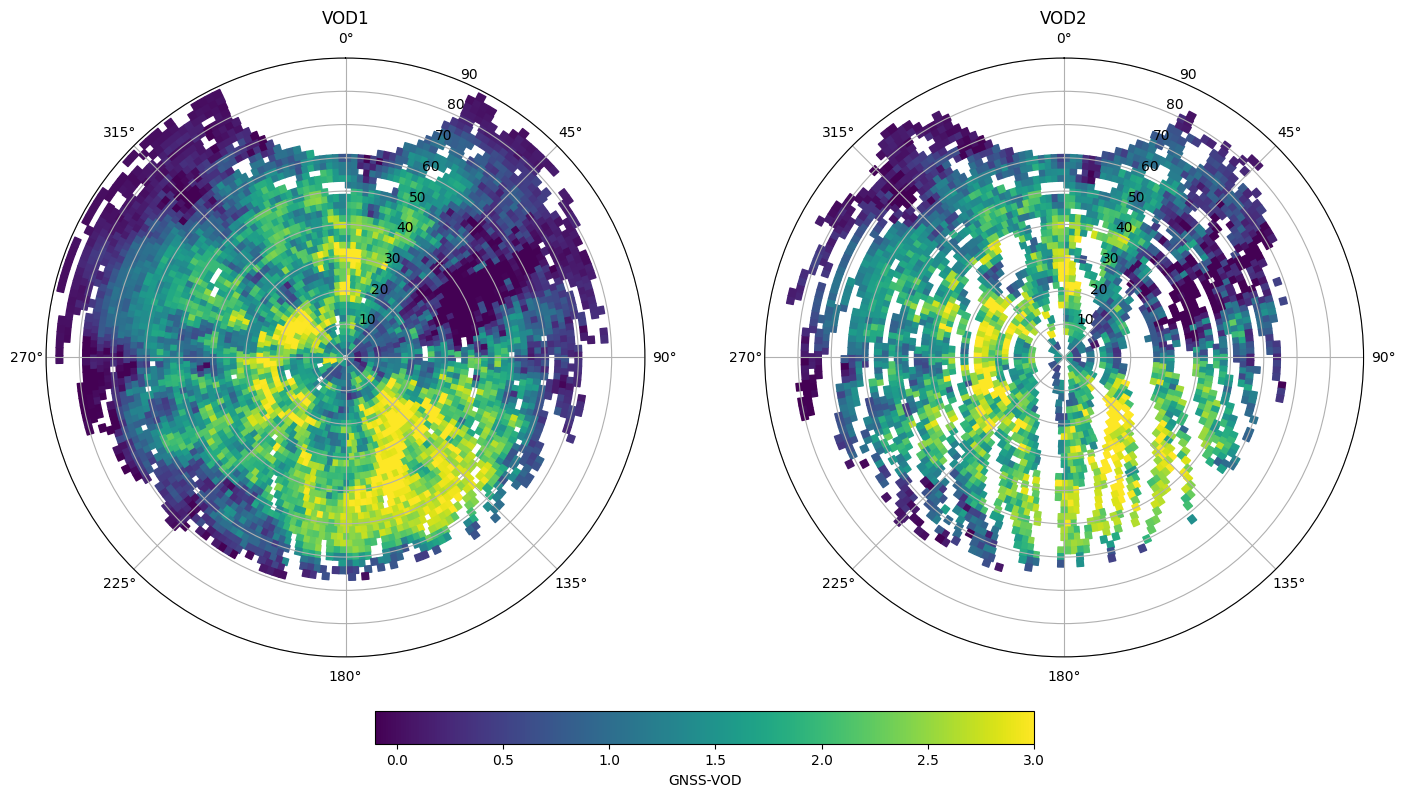

In [14]:
#MEAN
fig, ax = plt.subplots(1,2,figsize=(17,14),subplot_kw=dict(projection='polar'))

vod_names = ['VOD1','VOD2']
for i, iname in enumerate(vod_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ivod_data = vod_avg[f"{iname}_mean"].where(vod_avg[f"{iname}_count"]>40)
    ipatches = pd.concat([patches,ivod_data],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches[f"{iname}_mean"],edgecolor='face', linewidth=1)
    pc.set_clim([-0.1,3])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_theta_direction(-1)
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='GNSS-VOD')

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_9605/2655668566.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean = vod_numeric.resample('H').mean()


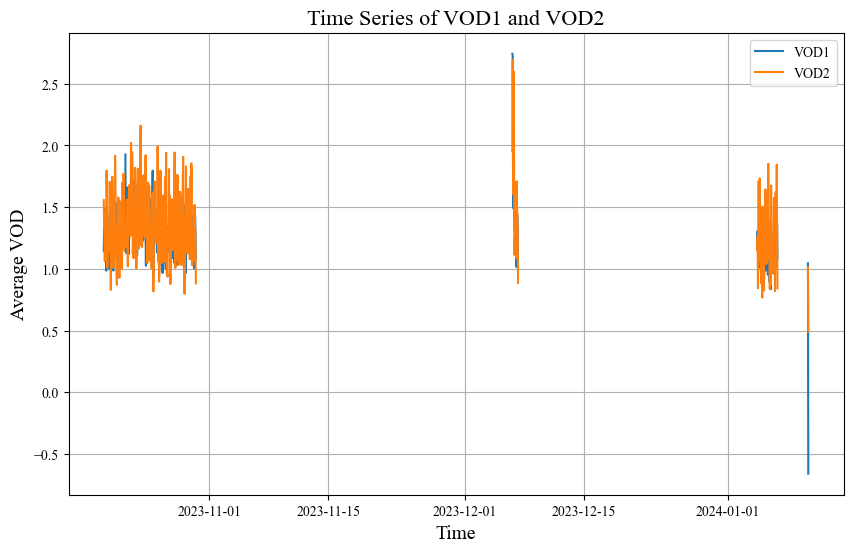

In [10]:
#VOD Diurnal Cycle

#font changing
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

#
vod_reset = vod.reset_index()
#vod_reset['Epoch']=vod_reset['Epoch']+datetime.timedelta(hours=-5)
vod_reset['Epoch'] = pd.to_datetime(vod_reset['Epoch'])
#.tz_convert('UTC-05')
vod_reset['Epoch']=vod_reset['Epoch']+timedelta(hours=-5) # local PR time
vod_reset.set_index('Epoch', inplace=True)
vod_numeric = vod_reset[['VOD1', 'VOD2']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_hourly_mean = vod_numeric.resample('H').mean()

# plotting
plt.figure(figsize=(10, 6))
plt.plot(vod_hourly_mean.index, vod_hourly_mean['VOD1'], label='VOD1')
plt.plot(vod_hourly_mean.index, vod_hourly_mean['VOD2'], label='VOD2')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Average VOD', fontsize=14)
plt.title('Time Series of VOD1 and VOD2', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_8329/2621483540.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean = vod_filtered.resample('H').mean()


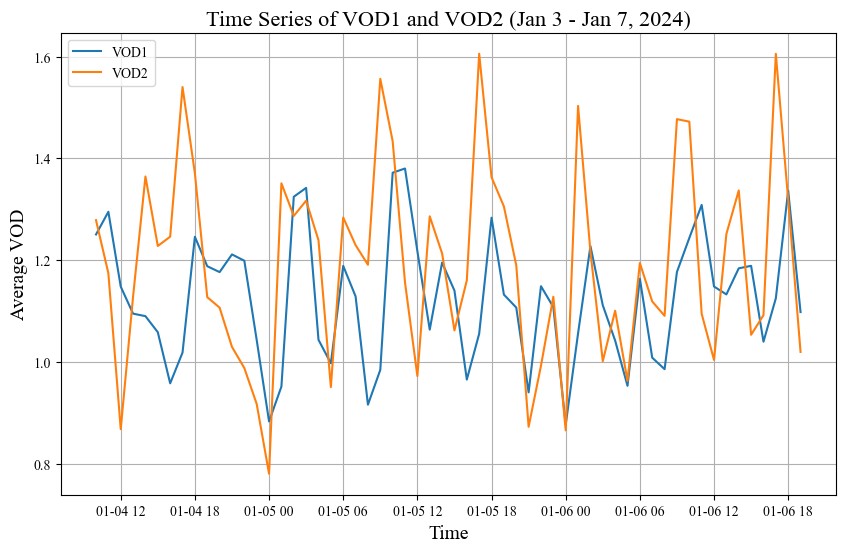

In [20]:


# Font setting
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Reset index and convert epoch time
vod_reset = vod.reset_index()
vod_reset['Epoch'] = pd.to_datetime(vod_reset['Epoch'])
vod_reset['Epoch'] = vod_reset['Epoch'] + timedelta(hours=-5)  # Convert to local PR time
vod_reset.set_index('Epoch', inplace=True)
vod_reset = vod_reset.sort_index()

#converting to numeric and interpotaling values
vod_numeric = vod_reset[['VOD1', 'VOD2']].apply(pd.to_numeric, errors='coerce').interpolate()

#start and end date filtering
start_date = "2024-01-03"
end_date = "2024-01-07"
vod_filtered = vod_numeric.loc[start_date:end_date]

# resampling
vod_hourly_mean = vod_filtered.resample('H').mean()

#plotting
plt.figure(figsize=(10, 6))
plt.plot(vod_hourly_mean.index, vod_hourly_mean['VOD1'], label='VOD1')
plt.plot(vod_hourly_mean.index, vod_hourly_mean['VOD2'], label='VOD2')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Average VOD', fontsize=14)
plt.title('Time Series of VOD1 and VOD2 (Jan 3 - Jan 7, 2024)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


In [52]:
precip_df = pd.read_excel('/Volumes/coraldelmar/precip24.xlsx')
precip_df.head()

Timestamp                Hour  Rain_mm_Tot
0 2024-01-01 00:00:00 2024-01-01 00:00:00          0.0
1 2024-01-01 01:00:00 2024-01-01 01:00:00          0.0
2 2024-01-01 02:00:00 2024-01-01 02:00:00          0.0
3 2024-01-01 03:00:00 2024-01-01 03:00:00          0.0
4 2024-01-01 04:00:00 2024-01-01 04:00:00          0.0

In [29]:
'''
def precip_df(precipitation_data):
    precipitation_data['Timestamp'] = pd.to_datetime(precipitation_data['Timestamp'])
    precipitation_data.set_index('Timestamp', inplace=True)
    precipitation_data = precipitation_data[precipitation_data['Rain_mm_Tot'] > 0.5]  # Filtering by precipitation threshold
    return precipitation_data
'''

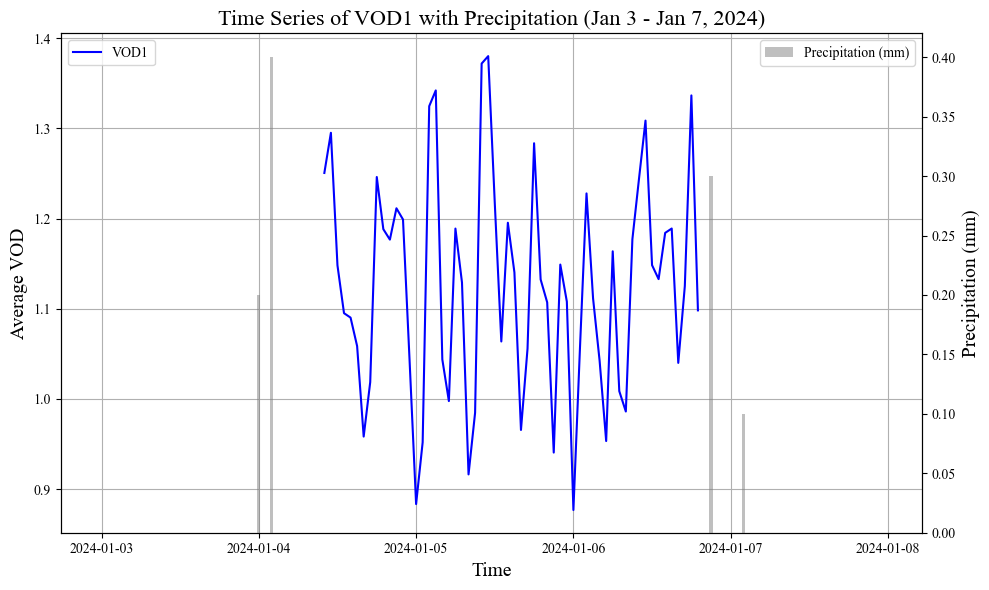

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from matplotlib import rcParams

# Font setting
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Reset index and convert epoch time
vod_reset = vod.reset_index()
vod_reset['Epoch'] = pd.to_datetime(vod_reset['Epoch'])
vod_reset['Epoch'] = vod_reset['Epoch'] + timedelta(hours=-5)  # Convert to local PR time
vod_reset.set_index('Epoch', inplace=True)
vod_reset = vod_reset.sort_index()

# Convert to numeric and interpolate values
vod_numeric = vod_reset[['VOD1']].apply(pd.to_numeric, errors='coerce').interpolate()

# Define start and end date
start_date = "2024-01-03"
end_date = "2024-01-07"

# Filter VOD data
vod_filtered = vod_numeric.loc[start_date:end_date]

# Resample VOD data to hourly means (Fix for FutureWarning)
vod_hourly_mean = vod_filtered.resample('h').mean()

# ✅ Ensure precip_df is defined and properly formatted
if isinstance(precip_df, pd.DataFrame):
    precip_df = precip_df.copy()  # Avoid modifying the original
    precip_df['Timestamp'] = pd.to_datetime(precip_df['Timestamp'])  # Convert to datetime
    precip_df.set_index('Timestamp', inplace=True)  # Set datetime index
    precip_filtered = precip_df.loc[start_date:end_date]  # Filter for date range
else:
    raise ValueError("Error: `precip_df` is not a valid DataFrame. Check its assignment.")

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot VOD1
ax1.plot(vod_hourly_mean.index, vod_hourly_mean['VOD1'], label='VOD1', color='blue')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Average VOD', fontsize=14, color='black')
ax1.set_title('Time Series of VOD1 with Precipitation (Jan 3 - Jan 7, 2024)', fontsize=16)
ax1.legend(loc='upper left')
ax1.grid(True)

# Precipitation (Second Y-axis)
ax2 = ax1.twinx()
ax2.bar(precip_filtered.index, precip_filtered["Rain_mm_Tot"], color='gray', alpha=0.5, label='Precipitation (mm)', width=0.02)
ax2.set_ylabel('Precipitation (mm)', fontsize=14, color='black')
ax2.legend(loc='upper right')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3359/3453229704.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean = vod_numeric.resample('3H').mean()


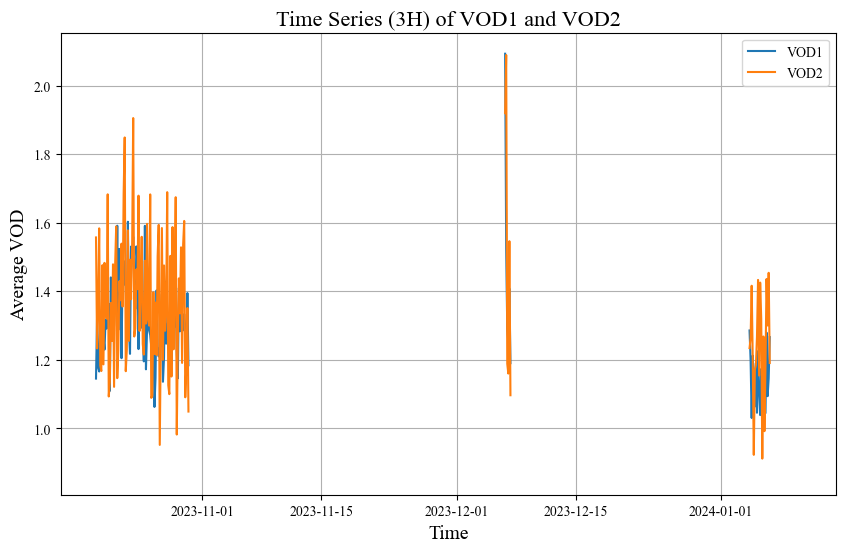

In [14]:
#VOD Diurnal Cycle

#font changing
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

#
vod_reset = vod.reset_index()
#vod_reset['Epoch']=vod_reset['Epoch']+datetime.timedelta(hours=-5)
vod_reset['Epoch'] = pd.to_datetime(vod_reset['Epoch'])
#.tz_convert('UTC-05')
vod_reset['Epoch']=vod_reset['Epoch']+timedelta(hours=-5) # local PR time
vod_reset.set_index('Epoch', inplace=True)
vod_numeric = vod_reset[['VOD1', 'VOD2']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_hourly_mean = vod_numeric.resample('3H').mean()

# plotting
plt.figure(figsize=(10, 6))
plt.plot(vod_hourly_mean.index, vod_hourly_mean['VOD1'], label='VOD1')
plt.plot(vod_hourly_mean.index, vod_hourly_mean['VOD2'], label='VOD2')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Average VOD', fontsize=14)
plt.title('Time Series (3H) of VOD1 and VOD2', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [51]:
#loading file
file_path = '/Volumes/coraldelmar/coffe_zentra.csv'  
coffee_zentra = pd.read_csv(file_path, skiprows=3)
#renaming columns
new_column_names = [
    'Timestamp', 'TEROS 21', 'TEROS 21.1', 'TEROS 21.2', 'TEROS 21.3', 
    'PHYTOS 31', 'PHYTOS 31.1', 'PHYTOS 31.2', 'Battery', 
    'Battery.1', 'Barometer', 'Barometer.1'
]
coffee_zentra.columns = new_column_names
print(coffee_zentra.head())

### below if we want to save as new file
#coffee_zentra.to_csv('updated_coffee_zentra.csv', index=False)


       Timestamp  TEROS 21  TEROS 21.1  TEROS 21.2  TEROS 21.3  PHYTOS 31  \
0  7/18/23 10:00      -0.1        25.0        -0.1        24.7       53.0   
1  7/18/23 11:00      -0.1        25.0        -0.1        24.7        0.0   
2  7/18/23 12:00      -0.1        25.0        -0.1        24.7        0.0   
3  7/18/23 13:00      -0.1        25.0        -0.1        24.7        0.0   
4  7/18/23 14:00      -0.1        25.0        -0.1        24.7        0.0   

   PHYTOS 31.1  PHYTOS 31.2  Battery  Battery.1  Barometer  Barometer.1  
0          0.0        448.0      100       8102      97.95         26.1  
1          0.0        449.0      100       8099      97.95         26.7  
2          0.0        448.0      100       8094      97.94         27.2  
3          0.0        449.0      100       8089      97.89         27.5  
4          0.0        448.0      100       8087      97.83         27.3  


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_9605/254953760.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coffee_zentra['Timestamp'] = pd.to_datetime(coffee_zentra['Timestamp'])
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_9605/254953760.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pythos31_hourly_mean = coffee_zentra['PHYTOS 31.2'].resample('3H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_9605/254953760.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean = vod_numeric.resample('3H').mean()


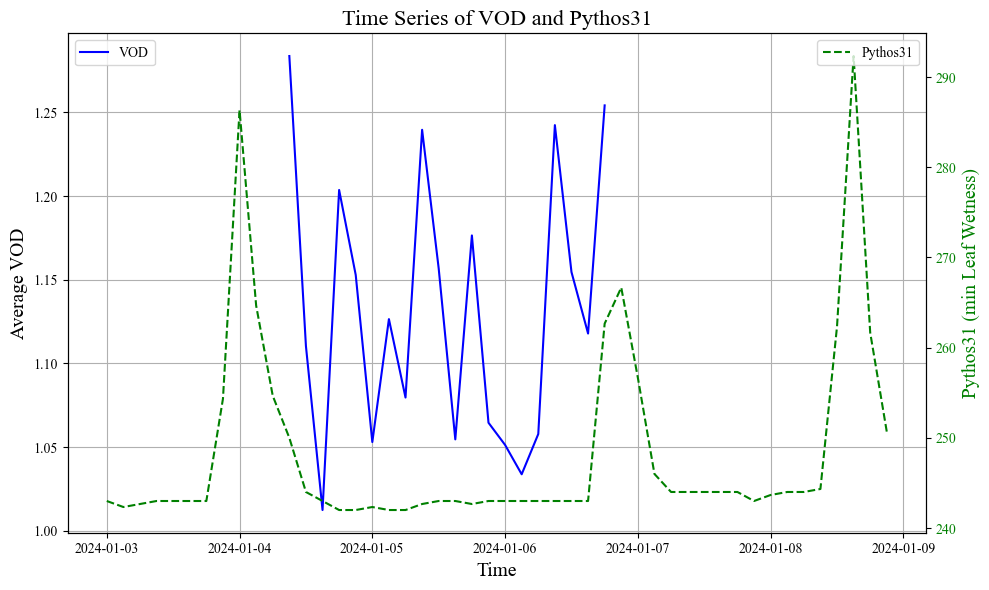

In [21]:

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# load csv
coffee_zentra = pd.read_csv('updated_coffee_zentra.csv')
#timestamp to datetime
coffee_zentra['Timestamp'] = pd.to_datetime(coffee_zentra['Timestamp'])
coffee_zentra.set_index('Timestamp', inplace=True)
coffee_zentra.sort_index(inplace=True)
#timestamp filtering
start_date = '2024-01-03'
end_date = '2024-01-08'
coffee_zentra = coffee_zentra.loc[start_date:end_date]
#leaf wetness data 
coffee_zentra['PHYTOS 31.2'] = pd.to_numeric(coffee_zentra['PHYTOS 31.2'], errors='coerce').interpolate()
#resampling to every 3 hrs
pythos31_hourly_mean = coffee_zentra['PHYTOS 31.2'].resample('3H').mean()

#VOD
vod_reset = vod.reset_index()
vod_reset['Epoch'] = pd.to_datetime(vod_reset['Epoch']) + timedelta(hours=-5)  # Convert to local PR time
vod_reset.set_index('Epoch', inplace=True)
vod_reset.sort_index(inplace=True)
vod_reset = vod_reset.loc[start_date:end_date]
vod_numeric = vod_reset[['VOD1']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_hourly_mean = vod_numeric.resample('3H').mean()

# plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(vod_hourly_mean.index, vod_hourly_mean['VOD1'], label='VOD', color='blue')
#ax1.plot(vod_hourly_mean.index, vod_hourly_mean['VOD2'], label='VOD2', color='orange')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Average VOD', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(pythos31_hourly_mean.index, pythos31_hourly_mean, label='Pythos31', color='green', linestyle='dashed')
ax2.set_ylabel('Pythos31 (min Leaf Wetness)', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')
plt.title('Time Series of VOD and Pythos31', fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_9605/2615719420.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coffee_zentra['Timestamp'] = pd.to_datetime(coffee_zentra['Timestamp'])
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_9605/2615719420.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pythos31_hourly_mean = coffee_zentra['PHYTOS 31.2'].resample('3H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_9605/2615719420.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean = vod_numeric.resample('3H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_9605/2615719420.py:41: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h'

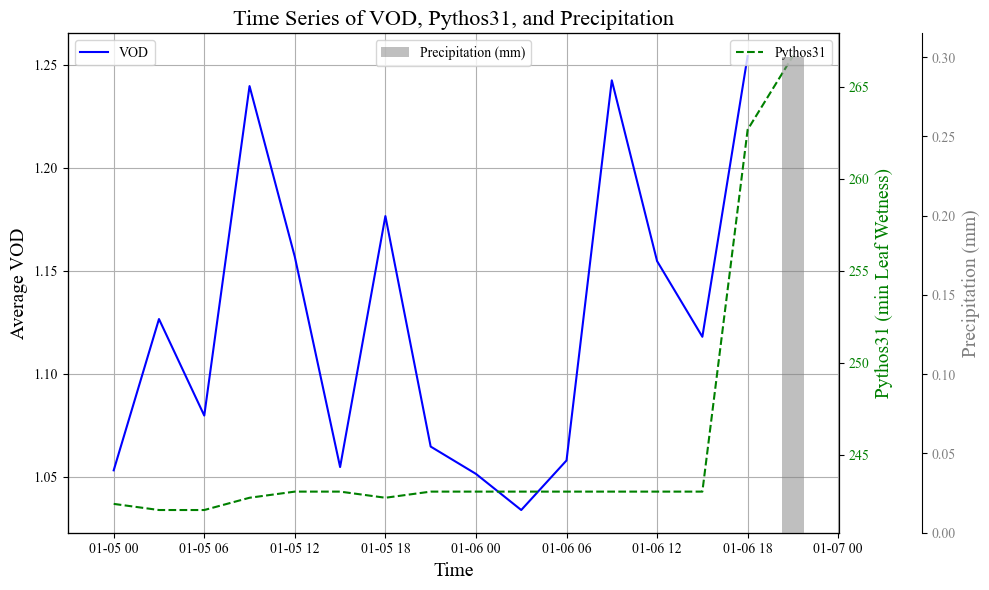

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import timedelta

# Font settings
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Load coffee_zentra data
coffee_zentra = pd.read_csv('updated_coffee_zentra.csv')
coffee_zentra['Timestamp'] = pd.to_datetime(coffee_zentra['Timestamp'])
coffee_zentra.set_index('Timestamp', inplace=True)
coffee_zentra.sort_index(inplace=True)

# Define date range
start_date = '2024-01-05'
end_date = '2024-01-06'

# Filter coffee_zentra data
coffee_zentra = coffee_zentra.loc[start_date:end_date]

# Process Pythos31 (Leaf Wetness)
coffee_zentra['PHYTOS 31.2'] = pd.to_numeric(coffee_zentra['PHYTOS 31.2'], errors='coerce').interpolate()
pythos31_hourly_mean = coffee_zentra['PHYTOS 31.2'].resample('3H').mean()

# Process VOD data
vod_reset = vod.reset_index()
vod_reset['Epoch'] = pd.to_datetime(vod_reset['Epoch']) + timedelta(hours=-5)  # Convert to local PR time
vod_reset.set_index('Epoch', inplace=True)
vod_reset.sort_index(inplace=True)
vod_reset = vod_reset.loc[start_date:end_date]

vod_numeric = vod_reset[['VOD1']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_hourly_mean = vod_numeric.resample('3H').mean()

# Process precipitation data
precip_df['Timestamp'] = pd.to_datetime(precip_df['Timestamp'])
precip_df.set_index('Timestamp', inplace=True)
precip_df = precip_df.loc[start_date:end_date]
precip_hourly = precip_df['Rain_mm_Tot'].resample('3H').sum()  # Sum precipitation in 3-hour bins

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot VOD
ax1.plot(vod_hourly_mean.index, vod_hourly_mean['VOD1'], label='VOD', color='blue')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Average VOD', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)

# Twin axis for Pythos31 (Leaf Wetness)
ax2 = ax1.twinx()
ax2.plot(pythos31_hourly_mean.index, pythos31_hourly_mean, label='Pythos31', color='green', linestyle='dashed')
ax2.set_ylabel('Pythos31 (min Leaf Wetness)', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Third axis for precipitation
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset third axis for visibility
ax3.bar(precip_hourly.index, precip_hourly, label='Precipitation (mm)', color='gray', alpha=0.5, width=0.06)
ax3.set_ylabel('Precipitation (mm)', fontsize=14, color='gray')
ax3.tick_params(axis='y', labelcolor='gray')
ax3.legend(loc='upper center')

plt.title('Time Series of VOD, Pythos31, and Precipitation', fontsize=16)
plt.tight_layout()
plt.show()



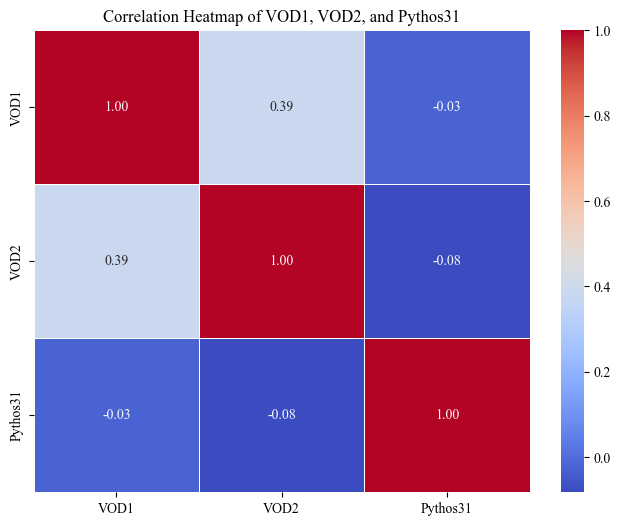

In [26]:
# combined VOD and Pythos data into a single DataFrame
merged_data = pd.concat([vod_hourly_mean, pythos31_hourly_mean], axis=1)
merged_data.columns = ['VOD1', 'VOD2', 'Pythos31']
#correlation matrix
correlation_matrix = merged_data.corr()

#plotting
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of VOD1, VOD2, and Pythos31")
plt.show()


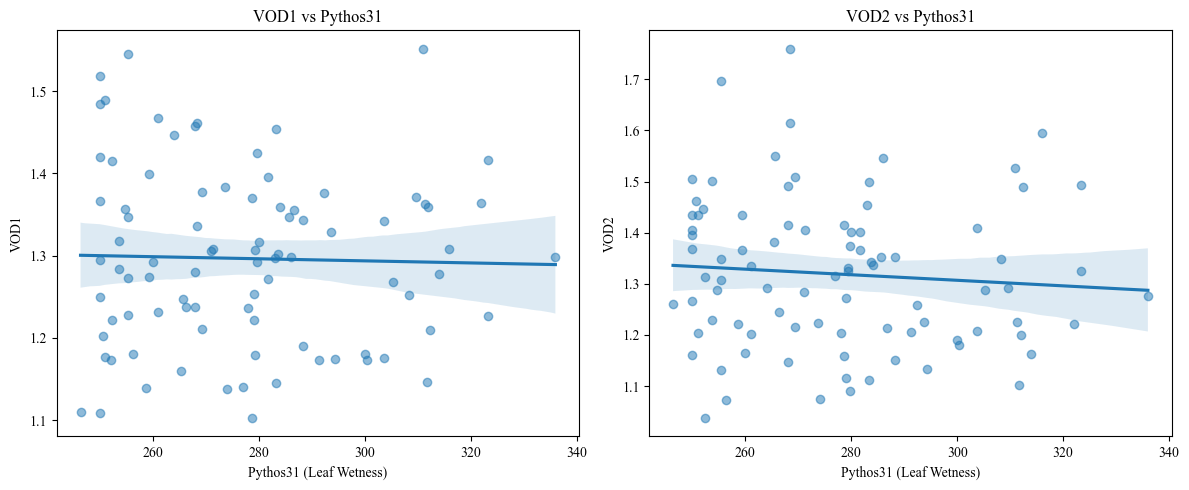

In [27]:
# Scatter plot of VOD1 vs Pythos31
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(x=merged_data['Pythos31'], y=merged_data['VOD1'], scatter_kws={'alpha':0.5})
plt.xlabel("Pythos31 (Leaf Wetness)")
plt.ylabel("VOD1")
plt.title("VOD1 vs Pythos31")

# Scatter plot of VOD2 vs Pythos31
plt.subplot(1, 2, 2)
sns.regplot(x=merged_data['Pythos31'], y=merged_data['VOD2'], scatter_kws={'alpha':0.5})
plt.xlabel("Pythos31 (Leaf Wetness)")
plt.ylabel("VOD2")
plt.title("VOD2 vs Pythos31")

plt.tight_layout()
plt.show()


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_29347/3997458568.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coffee_zentra['Timestamp'] = pd.to_datetime(coffee_zentra['Timestamp'])
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_29347/3997458568.py:29: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pythos31_hourly_mean = coffee_zentra['TEROS 21.3'].resample('3H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_29347/3997458568.py:44: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean = vod_numeric.resample('3H').mean()


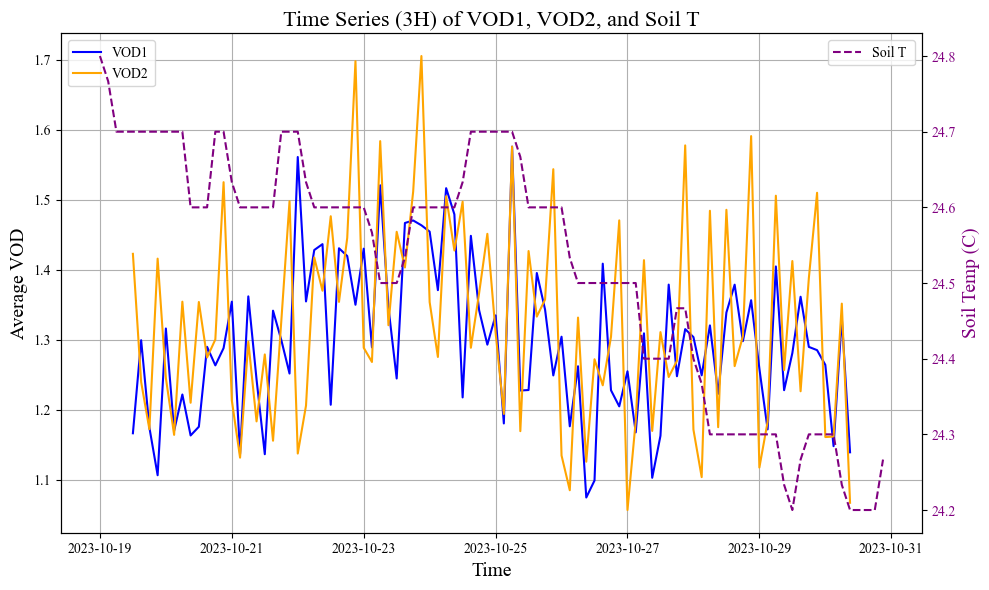

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import timedelta

# Font setup
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Load coffee_zentra.csv
coffee_zentra = pd.read_csv('updated_coffee_zentra.csv')

# Convert 'Timestamp' to datetime and set it as index
coffee_zentra['Timestamp'] = pd.to_datetime(coffee_zentra['Timestamp'])
coffee_zentra.set_index('Timestamp', inplace=True)

# Sort the index to enable proper slicing
coffee_zentra.sort_index(inplace=True)

# Filter data for the desired date range
start_date = '2023-10-19'
end_date = '2023-10-30'
coffee_zentra = coffee_zentra.loc[start_date:end_date]

# Extract and process 'PHYTOS 31.2' data
coffee_zentra['TEROS 21.3'] = pd.to_numeric(coffee_zentra['TEROS 21.3'], errors='coerce').interpolate()

# Resample Pythos31 data to match VOD's 3-hour intervals
pythos31_hourly_mean = coffee_zentra['TEROS 21.3'].resample('3H').mean()

# Reset VOD data for plotting
vod_reset = vod.reset_index()
vod_reset['Epoch'] = pd.to_datetime(vod_reset['Epoch']) + timedelta(hours=-5)  # Convert to local PR time
vod_reset.set_index('Epoch', inplace=True)

# Sort the VOD index to enable proper slicing
vod_reset.sort_index(inplace=True)

# Filter VOD data for the same date range
vod_reset = vod_reset.loc[start_date:end_date]

# Process VOD data
vod_numeric = vod_reset[['VOD1', 'VOD2']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_hourly_mean = vod_numeric.resample('3H').mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot VOD1 and VOD2 on the primary y-axis
ax1.plot(vod_hourly_mean.index, vod_hourly_mean['VOD1'], label='VOD1', color='blue')
ax1.plot(vod_hourly_mean.index, vod_hourly_mean['VOD2'], label='VOD2', color='orange')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Average VOD', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)

# Add a secondary y-axis for Pythos31
ax2 = ax1.twinx()
ax2.plot(pythos31_hourly_mean.index, pythos31_hourly_mean, label='Soil T ', color='purple', linestyle='dashed')
ax2.set_ylabel('Soil Temp (C)', fontsize=14, color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.legend(loc='upper right')

# Title and layout
plt.title('Time Series (3H) of VOD1, VOD2, and Soil T', fontsize=16)
plt.tight_layout()
plt.show()

In [53]:
#bringing in soilvue data 
soilvuedat=glob.glob("/Volumes/coraldelmar/soilvue/*.csv")
dataframes = []
for file in soilvuedat:
    df = pd.read_csv(file)
    dataframes.append(df)
combined_df = pd.concat(dataframes, ignore_index=True)
print(combined_df.head())

     VWC  depth                                     File     Site  \
0  0.348      5  1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv  Coffe 1   
1  0.641     10  1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv  Coffe 1   
2  0.597     20  1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv  Coffe 1   
3  0.590     30  1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv  Coffe 1   
4  0.539     40  1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv  Coffe 1   

   Temperature                   DT                   Probe_Name  
0        23.42  2024-12-09 14:00:00   Coffe 1_50cm_probe_depth_5  
1        23.09  2024-12-09 14:00:00  Coffe 1_50cm_probe_depth_10  
2        22.70  2024-12-09 14:00:00  Coffe 1_50cm_probe_depth_20  
3        22.76  2024-12-09 14:00:00  Coffe 1_50cm_probe_depth_30  
4        22.94  2024-12-09 14:00:00  Coffe 1_50cm_probe_depth_40  


In [54]:
#
combined_df['DT'] = combined_df['DT'].astype(str).str.strip()

#replacing gaps in dates
combined_df['DT'] = combined_df['DT'].apply(lambda x: x + " 00:00:00" if len(x) == 10 else x)

# converting to datetime 
combined_df['DT'] = pd.to_datetime(combined_df['DT'], format="%Y-%m-%d %H:%M:%S", errors='raise')

# making sure its correct
print(combined_df['DT'].isna().sum())


0


In [32]:
print(combined_df.columns)  # checking 'DT' is in the dataframe
print(combined_df.dtypes)   # checking if 'DT' is actually in datetime format
print(combined_df.head())  


Index(['VWC', 'depth', 'File', 'Site', 'Temperature', 'DT', 'Probe_Name'], dtype='object')
VWC                   float64
depth                   int64
File                   object
Site                   object
Temperature           float64
DT             datetime64[ns]
Probe_Name             object
dtype: object
     VWC  depth                                     File     Site  \
0  0.348      5  1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv  Coffe 1   
1  0.641     10  1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv  Coffe 1   
2  0.597     20  1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv  Coffe 1   
3  0.590     30  1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv  Coffe 1   
4  0.539     40  1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv  Coffe 1   

   Temperature                  DT                   Probe_Name  
0        23.42 2024-12-09 14:00:00   Coffe 1_50cm_probe_depth_5  
1        23.09 2024-12-09 14:00:00  Coffe 1_50cm_probe_depth_10  
2        22.70 2024-12-09 14:00:00  Coffe 1_50cm_probe_depth_20  
3     

In [21]:

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Ensure DT exists--- was getting errors before
if 'DT' not in combined_df.columns:
    raise KeyError("Column 'DT' is missing after concatenation. Check CSV structure.")
combined_df['DT'] = pd.to_datetime(combined_df['DT'], errors='coerce')
combined_df.set_index('DT', inplace=True)
combined_df.sort_index(inplace=True)
print(combined_df.index)

# date range
start_date = '2023-10-19'
end_date = '2023-10-30'

# filtering per date soil moisture data
soil_moisture_filtered = combined_df[(combined_df.index >= start_date) & (combined_df.index <= end_date)]

# Resample Soil Moisture (VWC) to 3-hour intervals
soil_moisture_hourly_mean = soil_moisture_filtered['VWC'].resample('3H').mean()
#
vod_reset = vod.reset_index()
vod_reset['Epoch'] = pd.to_datetime(vod_reset['Epoch']) + timedelta(hours=-5)  # Convert to local PR time
vod_reset.set_index('Epoch', inplace=True)
vod_reset.sort_index(inplace=True)
vod_reset = vod_reset.loc[start_date:end_date]
vod1_numeric = pd.to_numeric(vod_reset['VOD1'], errors='coerce').interpolate()
vod1_hourly_mean = vod1_numeric.resample('3H').mean()

# plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(vod1_hourly_mean.index, vod1_hourly_mean, label='VOD1', color='blue')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Average VOD1', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(soil_moisture_hourly_mean.index, soil_moisture_hourly_mean, label='Soil Moisture (VWC)', color='green', linestyle='dashed')
ax2.set_ylabel('Soil Moisture (VWC)', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')
plt.title('Time Series (3H) of VOD1 and Soil Moisture', fontsize=16)
plt.tight_layout()
plt.show()


KeyError: "Column 'DT' is missing after concatenation. Check CSV structure."

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_12582/3267095122.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  soil_moisture_hourly_mean = soil_moisture_filtered['VWC'].resample('3H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_12582/3267095122.py:36: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod1_hourly_mean = vod1_numeric.resample('3H').mean()


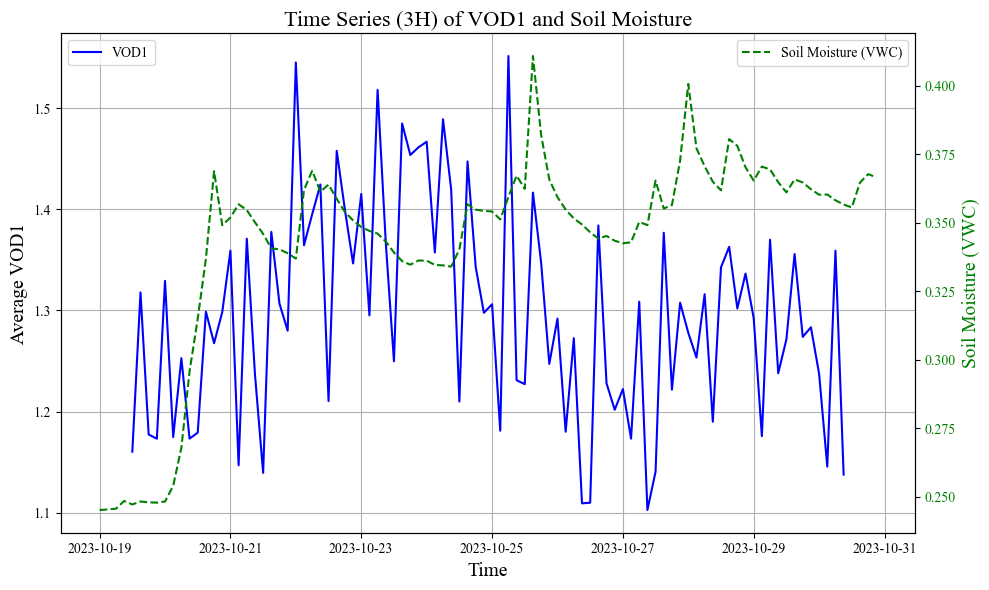

In [18]:

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# loading the soil moisture dataset (combined_df)
combined_df['DT'] = pd.to_datetime(combined_df['DT'])  # Ensure datetime format
combined_df.set_index('DT', inplace=True)
combined_df.sort_index(inplace=True)  # Sort for proper slicing

#  date range
start_date = '2023-10-19'
end_date = '2023-10-30'

# filtering soil moisture data
soil_moisture_filtered = combined_df.loc[start_date:end_date]

# resampling to 3hr
soil_moisture_hourly_mean = soil_moisture_filtered['VWC'].resample('3H').mean()

# 
vod_reset = vod.reset_index()
vod_reset['Epoch'] = pd.to_datetime(vod_reset['Epoch']) + timedelta(hours=-5)  # Convert to local PR time
vod_reset.set_index('Epoch', inplace=True)
vod_reset.sort_index(inplace=True)
vod_reset = vod_reset.loc[start_date:end_date]
vod1_numeric = pd.to_numeric(vod_reset['VOD1'], errors='coerce').interpolate()
vod1_hourly_mean = vod1_numeric.resample('3H').mean()

# plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(vod1_hourly_mean.index, vod1_hourly_mean, label='VOD1', color='blue')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Average VOD1', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(soil_moisture_hourly_mean.index, soil_moisture_hourly_mean, label='Soil Moisture (VWC)', color='green', linestyle='dashed')
ax2.set_ylabel('Soil Moisture (VWC)', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')
plt.title('Time Series (3H) of VOD1 and Soil Moisture', fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_9605/3874316747.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  soil_moisture_10cm_hourly = soil_moisture_10cm.resample('3H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_9605/3874316747.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  soil_moisture_20cm_hourly = soil_moisture_20cm.resample('3H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_9605/3874316747.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coffee_zentra['Timestamp'] = pd.to_datetime(coffee_zentra['Timestamp'])
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_9605/3874316747.py:36: FutureWarning: 'H' is deprecated and will be removed in a future version, pl

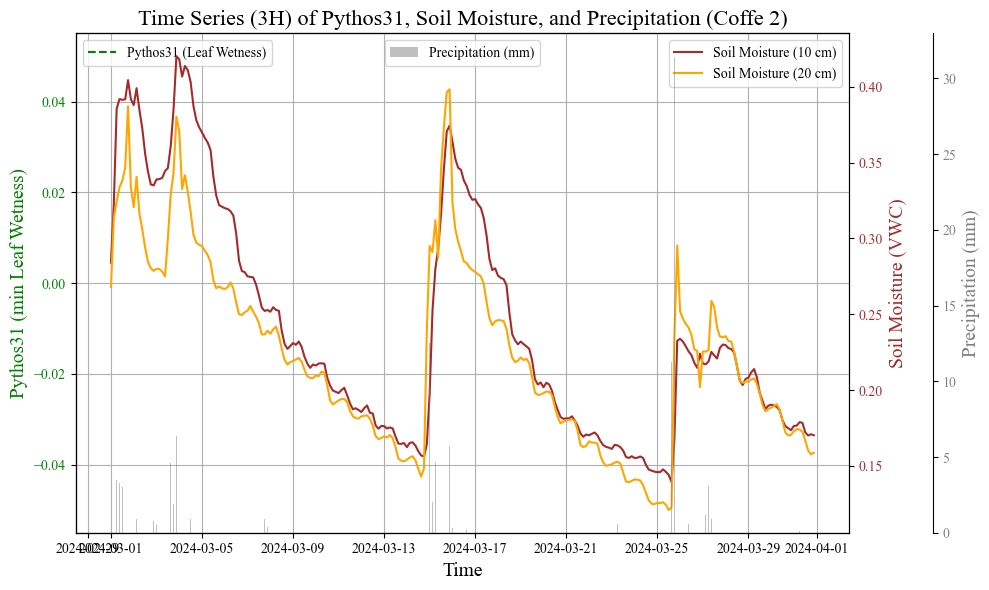

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Font settings
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Date range
start_date = '2024-03-01'
end_date = '2024-03-31'

# Load and process soil moisture data (filtered for "Coffe 2" site)
combined_df['DT'] = pd.to_datetime(combined_df['DT'])
combined_df.set_index('DT', inplace=True)
combined_df.sort_index(inplace=True)

# Filter for "Coffe 2" site and specific depths
soil_moisture_filtered = combined_df[(combined_df['Site'] == 'Coffe 2') & 
                                     (combined_df['depth'].isin([10, 20]))].loc[start_date:end_date]

# Separate 10 cm and 20 cm soil moisture
soil_moisture_10cm = soil_moisture_filtered[soil_moisture_filtered['depth'] == 10]['VWC']
soil_moisture_20cm = soil_moisture_filtered[soil_moisture_filtered['depth'] == 20]['VWC']

# Resample to 3-hour intervals
soil_moisture_10cm_hourly = soil_moisture_10cm.resample('3H').mean()
soil_moisture_20cm_hourly = soil_moisture_20cm.resample('3H').mean()

# Load and process Pythos31 (Leaf Wetness) from Coffee 2 site
coffee_zentra['Timestamp'] = pd.to_datetime(coffee_zentra['Timestamp'])
coffee_zentra.set_index('Timestamp', inplace=True)
coffee_zentra.sort_index(inplace=True)
coffee_zentra = coffee_zentra.loc[start_date:end_date]
coffee_zentra['PHYTOS 31.2'] = pd.to_numeric(coffee_zentra['PHYTOS 31.2'], errors='coerce').interpolate()
pythos31_hourly_mean = coffee_zentra['PHYTOS 31.2'].resample('3H').mean()

# Load and process precipitation data
precip_df['Hour'] = pd.to_datetime(precip_df['Hour'])
precip_df.set_index('Hour', inplace=True)
precip_df = precip_df.loc[start_date:end_date]
precip_hourly = precip_df['Rain_mm_Tot'].resample('3H').sum()  # Sum precipitation in 3-hour bins

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Pythos (Leaf Wetness)
ax1.plot(pythos31_hourly_mean.index, pythos31_hourly_mean, label='Pythos31 (Leaf Wetness)', color='green', linestyle='dashed')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Pythos31 (min Leaf Wetness)', fontsize=14, color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(loc='upper left')
ax1.grid(True)

# Twin axis for Soil Moisture (10 cm & 20 cm)
ax2 = ax1.twinx()
ax2.plot(soil_moisture_10cm_hourly.index, soil_moisture_10cm_hourly, label='Soil Moisture (10 cm)', color='brown')
ax2.plot(soil_moisture_20cm_hourly.index, soil_moisture_20cm_hourly, label='Soil Moisture (20 cm)', color='orange')
ax2.set_ylabel('Soil Moisture (VWC)', fontsize=14, color='brown')
ax2.tick_params(axis='y', labelcolor='brown')
ax2.legend(loc='upper right')

# Third axis for precipitation
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset third axis for visibility
ax3.bar(precip_hourly.index, precip_hourly, label='Precipitation (mm)', color='gray', alpha=0.5, width=0.02)
ax3.set_ylabel('Precipitation (mm)', fontsize=14, color='gray')
ax3.tick_params(axis='y', labelcolor='gray')
ax3.legend(loc='upper center')

plt.title('Time Series (3H) of Pythos31, Soil Moisture, and Precipitation (Coffe 2)', fontsize=16)
plt.tight_layout()
plt.show()


In [49]:
precip_df.head()

Hour  Rain_mm_Tot
Timestamp                                           
2024-01-05 00:00:00 2024-01-05 00:00:00          0.0
2024-01-05 01:00:00 2024-01-05 01:00:00          0.0
2024-01-05 02:00:00 2024-01-05 02:00:00          0.0
2024-01-05 03:00:00 2024-01-05 03:00:00          0.0
2024-01-05 04:00:00 2024-01-05 04:00:00          0.0

In [39]:
combined_df['DT'] = pd.to_datetime(combined_df['DT'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
print(combined_df[combined_df['DT'].isna()])



           VWC  depth                                               File  \
60       0.367      5            1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv   
61       0.644     10            1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv   
62       0.597     20            1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv   
63       0.593     30            1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv   
64       0.539     40            1_7_2024/Coffe 1/Coffe 1_SoilVUE_hr.csv   
...        ...    ...                                                ...   
1347340  0.067     10  1_8_2024/OmarLower/OmarLower_SoilVUE10_OmarLow...   
1347341  0.299     20  1_8_2024/OmarLower/OmarLower_SoilVUE10_OmarLow...   
1347342  0.419     30  1_8_2024/OmarLower/OmarLower_SoilVUE10_OmarLow...   
1347343  0.507     40  1_8_2024/OmarLower/OmarLower_SoilVUE10_OmarLow...   
1347344  0.485     50  1_8_2024/OmarLower/OmarLower_SoilVUE10_OmarLow...   

               Site  Temperature  DT                      Probe_Name  
60          Coff

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_12582/2178470658.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  soil_moisture_hourly_mean = soil_moisture_filtered['VWC'].resample('H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_12582/2178470658.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod1_hourly_mean = vod1_numeric.resample('H').mean()


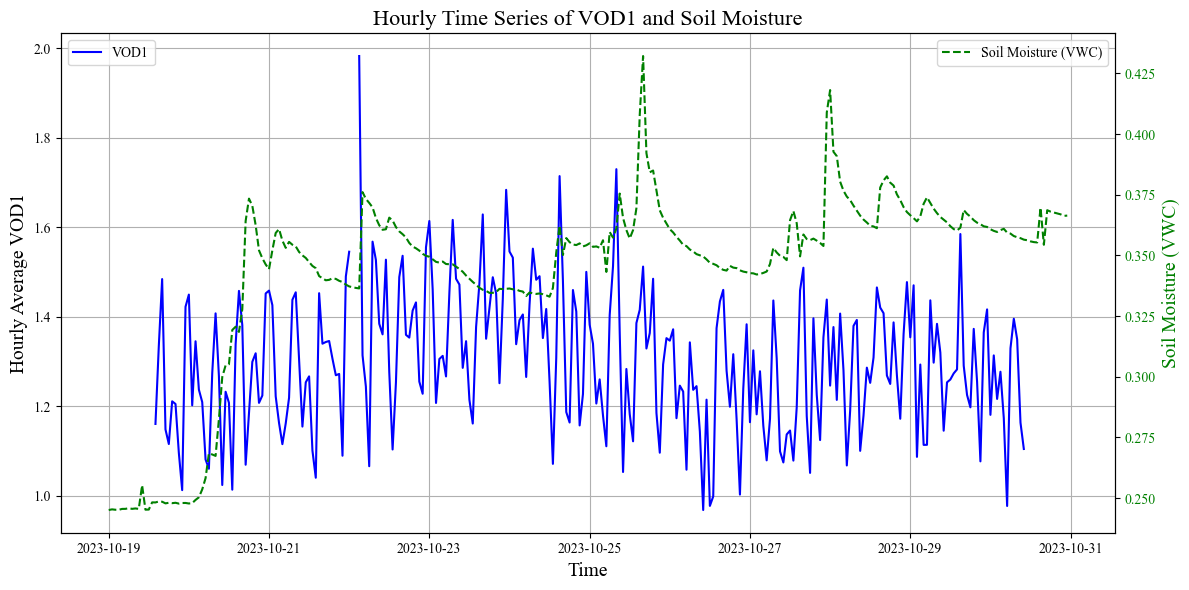

In [26]:

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
if not isinstance(combined_df.index, pd.DatetimeIndex):
    combined_df.index = pd.to_datetime(combined_df.index)

# date range
start_date = '2023-10-19'
end_date = '2023-10-30'

# filtering soil moisture data
soil_moisture_filtered = combined_df.loc[start_date:end_date]

#hourly
soil_moisture_hourly_mean = soil_moisture_filtered['VWC'].resample('H').mean()

# 
vod_reset = vod.reset_index()
vod_reset['Epoch'] = pd.to_datetime(vod_reset['Epoch']) + timedelta(hours=-5)  # Convert to local PR time
vod_reset.set_index('Epoch', inplace=True)
vod_reset.sort_index(inplace=True)
vod_reset = vod_reset.loc[start_date:end_date]
vod1_numeric = pd.to_numeric(vod_reset['VOD1'], errors='coerce').interpolate()
vod1_hourly_mean = vod1_numeric.resample('H').mean()

# plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(vod1_hourly_mean.index, vod1_hourly_mean, label='VOD1', color='blue')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Hourly Average VOD1', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(soil_moisture_hourly_mean.index, soil_moisture_hourly_mean, label='Soil Moisture (VWC)', color='green', linestyle='dashed')
ax2.set_ylabel('Soil Moisture (VWC)', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')
plt.title('Hourly Time Series of VOD1 and Soil Moisture', fontsize=16)
plt.tight_layout()
plt.show()



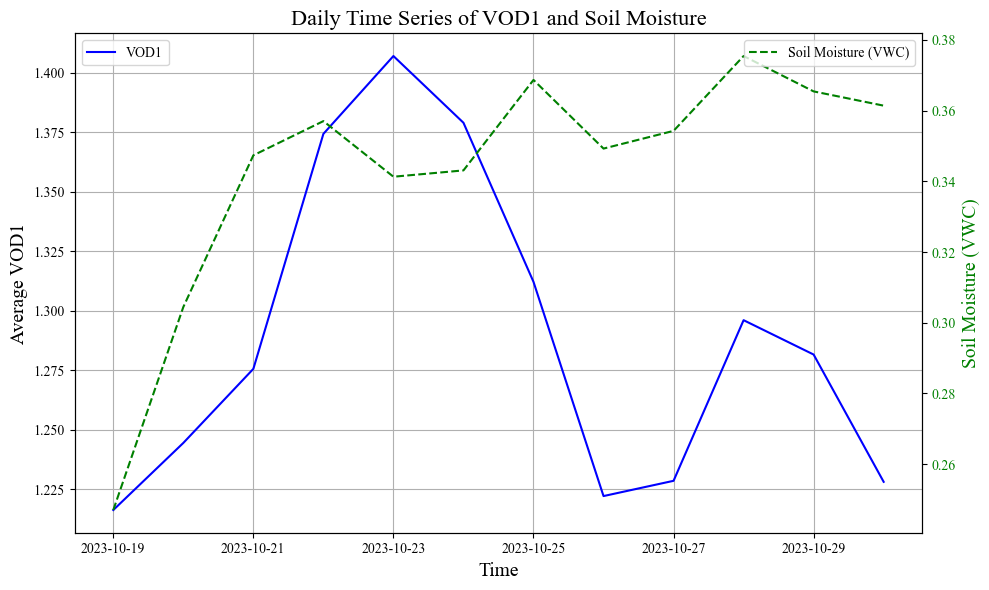

In [22]:

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

#  DT is a datetime index
if not isinstance(combined_df.index, pd.DatetimeIndex):
    combined_df.index = pd.to_datetime(combined_df.index)

#  date range
start_date = '2023-10-19'
end_date = '2023-10-30'
soil_moisture_filtered = combined_df.loc[start_date:end_date]

# daily
soil_moisture_daily_mean = soil_moisture_filtered['VWC'].resample('D').mean()

# 
vod_reset = vod.reset_index()
vod_reset['Epoch'] = pd.to_datetime(vod_reset['Epoch']) + timedelta(hours=-5)  # Convert to local PR time
vod_reset.set_index('Epoch', inplace=True)
vod_reset.sort_index(inplace=True)
vod_reset = vod_reset.loc[start_date:end_date]
vod1_numeric = pd.to_numeric(vod_reset['VOD1'], errors='coerce').interpolate()
vod1_daily_mean = vod1_numeric.resample('D').mean()

# plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(vod1_daily_mean.index, vod1_daily_mean, label='VOD1', color='blue')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Average VOD1', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(soil_moisture_daily_mean.index, soil_moisture_daily_mean, label='Soil Moisture (VWC)', color='green', linestyle='dashed')
ax2.set_ylabel('Soil Moisture (VWC)', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')
plt.title('Daily Time Series of VOD1 and Soil Moisture', fontsize=16)
plt.tight_layout()
plt.show()


In [30]:
print(coffee_zentra.columns)


Index(['z6-21164', 'Port 2', 'Port 2.1', 'Port 5', 'Port 5.1', 'Port 6',
       'Port 6.1', 'Port 6.2', 'Port 7', 'Port 7.1', 'Port 8', 'Port 8.1'],
      dtype='object')


Part IIb. VOD 'statistics'

In [22]:
# merge statistics with the original VOD measurements
vod_anom = vod.join(vod_avg,on='CellID')
vod_anom

VOD1      VOD2  Azimuth  Elevation  CellID  \
Epoch               SV                                                    
2023-10-19 19:01:15 G10  2.043531  0.860434   -178.3       69.1     397   
                    G25 -0.358198  0.309353     49.6       45.0    1944   
                    G26  1.417108       NaN   -152.6       33.0    3100   
                    G28  0.932114  1.723531    -45.5       49.8    1591   
                    G31  1.256031       NaN    -82.0       37.8    2572   
...                           ...       ...      ...        ...     ...   
2023-10-23 23:59:45 R11  0.668455       NaN     72.5       14.0    4907   
                    R12  0.653872  1.483787     13.7       33.1    2806   
                    R13  1.721543  0.690101    -36.3       18.8    4621   
                    R21       NaN       NaN     31.9       11.3    5104   
                    R22  2.071093 -0.250535     70.5       46.5    1794   

                         VOD1_mean  VOD1_std  VOD1_count  VOD2_mean  VOD2_std  \
Epoch               SV                                                          
2023-10-19 19:01:15 G10   1.792505  0.863591         361   0.859959  0.432072   
                    G25   0.640875  0.602834         564   1.071919  0.706692   
                    G26   1.095902  0.728083         449   1.102654  0.725691   
                    G28   1.812176  0.826295         456   1.977728  0.775424   
                    G31   1.374339  0.633845         245   1.825128  0.666023   
...                            ...       ...         ...        ...       ...   
2023-10-23 23:59:45 R11   0.250760  0.332689         148        NaN       NaN   
                    R12   1.474297  0.696934          83   1.290631  0.475702   
                    R13   0.436027  0.414786        1051   0.564306  0.397499   
                    R21   0.355067  0.277390         110   0.309614  0.119947   
                    R22   0.672945  0.995921         210  -0.645612  0.589574   

                         VOD2_count  Azimuth_mean  Azimuth_std  Azimuth_count  \
Epoch               SV                                                          
2023-10-19 19:01:15 G10         187   -177.281994     1.185319            361   
                    G25         483     49.018555     0.613285            609   
                    G26         270   -152.989249     0.470757            493   
                    G28         360    -45.254167     0.711467            504   
                    G31         162    -82.556250     0.584046            384   
...                             ...           ...          ...            ...   
2023-10-23 23:59:45 R11           0     72.168159     0.442359            201   
                    R12          68     14.226506     0.547519             83   
                    R13         678    -35.660245     0.510182           1308   
                    R21          13     31.486207     0.436368            116   
                    R22         151     71.374609     0.643169            256   

                         Elevation_mean  Elevation_std  Elevation_count  
Epoch               SV                                                   
2023-10-19 19:01:15 G10       70.049307       0.580092              361  
                    G25       43.772742       0.626928              609  
                    G26       32.031440       0.592917              493  
                    G28       49.822817       0.385749              504  
                    G31       37.885156       0.502332              384  
...                                 ...            ...              ...  
2023-10-23 23:59:45 R11       13.966169       0.780865              201  
                    R12       33.709639       0.586768               83  
                    R13       18.069801       0.553985             1308  
                    R21       12.398276       0.520699              116  
                    R22       46.487891       0.557419   

In [23]:
#anomaly= VOD-VOD mean
vod_anom['VOD1_anom'] = vod_anom['VOD1']-vod_anom['VOD1_mean']
vod_anom['VOD2_anom'] = vod_anom['VOD2']-vod_anom['VOD2_mean']

KeyError: 'VOD1_anom'

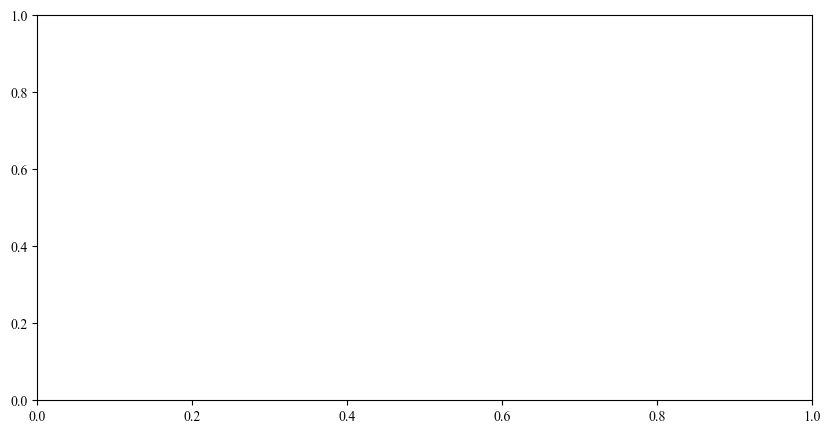

In [24]:
vod_names = ['VOD1_anom','VOD2_anom']
#without mean value 

fig, ax = plt.subplots(1,figsize=(10,5))
for i, iname in enumerate(vod_names): 
    # plot each measurement and color by signal to noise ratio
    hs = ax.plot(vod_ts.index.get_level_values('Epoch'),vod_ts[iname],label=iname)
    
myFmt = mdates.DateFormatter('%H')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('GNSS-VOD (L1)')
ax.legend()
plt.title('GNSS-VOD at Luquillo, Puerto Rico , October 19-28, 2023')
#lt.savefig('figures/illustration_vod.png',facecolor='white', transparent=False,bbox_inches='tight')

In [17]:
vod_ts = vod_anom.groupby(pd.Grouper(freq='1H', level='Epoch')).mean()
vod_ts

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_27770/1840474700.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_ts = vod_anom.groupby(pd.Grouper(freq='1H', level='Epoch')).mean()


VOD1      VOD2    Azimuth  Elevation       CellID  \
Epoch                                                                        
2023-10-19 19:00:00  1.236426  1.435447  -9.520125  44.664210  2163.564964   
2023-10-19 20:00:00  1.372315  1.469981  -7.664058  42.718331  2355.203848   
2023-10-19 21:00:00  1.459913  1.440883  -0.040062  41.865959  2424.891730   
2023-10-19 22:00:00  1.174933  1.199638   8.380378  38.910621  2607.007599   
2023-10-19 23:00:00  1.103516  1.084780   4.304025  36.245686  2848.154907   
...                       ...       ...        ...        ...          ...   
2023-10-30 11:00:00  1.353788  1.641521  -3.548127  45.632134  2132.798509   
2023-10-30 12:00:00  1.429638  1.400013   2.959896  41.165986  2473.552249   
2023-10-30 13:00:00  1.391344  1.405222  -4.758691  39.211047  2623.028776   
2023-10-30 14:00:00  1.187006  1.178749 -17.527710  36.765439  2821.408015   
2023-10-30 15:00:00  1.073791  1.018465  -6.673962  34.021736  3001.274061   

                     VOD1_mean  VOD1_std  VOD1_count  VOD2_mean  VOD2_std  \
Epoch                                                                       
2023-10-19 19:00:00   1.373686  0.639304  383.175609   1.470263  0.597631   
2023-10-19 20:00:00   1.430702  0.646790  383.445986   1.479776  0.577011   
2023-10-19 21:00:00   1.533122  0.643839  432.603736   1.579065  0.579105   
2023-10-19 22:00:00   1.289338  0.618413  355.174265   1.338592  0.550576   
2023-10-19 23:00:00   1.160376  0.593746  360.905548   1.202631  0.546661   
...                        ...       ...         ...        ...       ...   
2023-10-30 11:00:00   1.427259  0.652118  369.986580   1.524477  0.595024   
2023-10-30 12:00:00   1.447763  0.625556  389.117301   1.476310  0.552439   
2023-10-30 13:00:00   1.421272  0.624249  407.962148   1.404755  0.568798   
2023-10-30 14:00:00   1.164360  0.568787  390.232824   1.171469  0.529064   
2023-10-30 15:00:00   1.099149  0.584998  378.584183   1.029673  0.534090   

                     VOD2_count  Azimuth_mean  Azimuth_std  Azimuth_count  \
Epoch                                                                       
2023-10-19 19:00:00  212.326869    -10.924101     2.768531     493.239819   
2023-10-19 20:00:00  198.224010     -7.674247     0.778818     497.287828   
2023-10-19 21:00:00  231.980595     -0.117547     1.076241     546.490932   
2023-10-19 22:00:00  183.448835      8.375887     0.651314     458.650118   
2023-10-19 23:00:00  174.245991      4.295935     0.636625     468.751604   
...                         ...           ...          ...            ...   
2023-10-30 11:00:00  187.760857     -3.560126     0.934461     459.790121   
2023-10-30 12:00:00  199.040657      2.948773     0.710024     494.223356   
2023-10-30 13:00:00  209.377366     -4.777524     0.755240     525.086520   
2023-10-30 14:00:00  204.174809    -17.530303     0.639370     511.878817   
2023-10-30 15:00:00  186.723452     -6.688264     0.563884     500.069386   

                     Elevation_mean  Elevation_std  Elevation_count  
Epoch                                                                
2023-10-19 19:00:00       44.654701       0.547534       493.239819  
2023-10-19 20:00:00       42.724386       0.545544       497.287828  
2023-10-19 21:00:00       41.858291       0.540835       546.490932  
2023-10-19 22:00:00       38.923356       0.537802       458.650118  
2023-10-19 23:00:00       36.262888       0.543096       468.751604  
...                             ...            ...              ...  
2023-10-30 11:00:00       45.623790       0.539657       459.790121  
2023-10-30 12:00:00       41.145038       0.539614       494.223356  
2023-10-30 13:00:00       39.183636       0.553218       525.086520  
2023-10-30 14:00:00       36.741185       0.536430       511.878817  
2023-10-30 15:00:00       34.029064       0.544199       500.069386  

[261 rows x 17 columns]

In [18]:
vod_ts['VOD1_anom'] = vod_ts['VOD1_anom']+vod_ts['VOD1'].mean()
vod_ts['VOD2_anom'] = vod_ts['VOD2_anom']+vod_ts['VOD2'].mean()

KeyError: 'VOD1_anom'

In [20]:
#subsetting for areas with more or less vegetation based on azimuth and elevation
# Subset the vod_avg dataframe based on the specified azimuth and elevation ranges

vod_anom_subset_moreveg = vod_anom[
    (vod_anom['Azimuth_mean'] >= 120) & (vod_anom['Azimuth_mean'] <= 150) &
    (vod_anom['Elevation_mean'] >= 20) & (vod_anom['Elevation_mean'] <= 40)
]

vod_anom_subset_moreveg.head()
#
vod_anom_subset_lessveg = vod_anom[
    ((vod_anom['Azimuth_mean'] >= 30) & (vod_anom['Azimuth_mean'] <= 40) &
     (vod_anom['Elevation_mean'] >= 50) & (vod_anom['Elevation_mean'] <= 60)) 
]

vod_anom_subset_lessveg.head()

VOD1  VOD2  Azimuth  Elevation  CellID  \
Epoch               SV                                                
2023-10-19 19:02:00 E04  0.456079   NaN     37.1       52.4    1336   
2023-10-19 19:02:15 E04  0.456079   NaN     37.3       52.4    1336   
2023-10-19 19:02:30 E04  0.511494   NaN     37.4       52.5    1336   
2023-10-19 19:02:45 E04  0.310550   NaN     37.6       52.5    1336   
2023-10-19 19:03:00 E04  0.036535   NaN     37.7       52.5    1336   

                         VOD1_mean  VOD1_std  VOD1_count  VOD2_mean  VOD2_std  \
Epoch               SV                                                          
2023-10-19 19:02:00 E04   1.029885  0.563952         419   0.517415  0.677797   
2023-10-19 19:02:15 E04   1.029885  0.563952         419   0.517415  0.677797   
2023-10-19 19:02:30 E04   1.029885  0.563952         419   0.517415  0.677797   
2023-10-19 19:02:45 E04   1.029885  0.563952         419   0.517415  0.677797   
2023-10-19 19:03:00 E04   1.029885  0.563952         419   0.517415  0.677797   

                         VOD2_count  Azimuth_mean  Azimuth_std  Azimuth_count  \
Epoch               SV                                                          
2023-10-19 19:02:00 E04         274     37.257884     0.607884            501   
2023-10-19 19:02:15 E04         274     37.257884     0.607884            501   
2023-10-19 19:02:30 E04         274     37.257884     0.607884            501   
2023-10-19 19:02:45 E04         274     37.257884     0.607884            501   
2023-10-19 19:03:00 E04         274     37.257884     0.607884            501   

                         Elevation_mean  Elevation_std  Elevation_count  \
Epoch               SV                                                    
2023-10-19 19:02:00 E04       51.896407        0.59735              501   
2023-10-19 19:02:15 E04       51.896407        0.59735              501   
2023-10-19 19:02:30 E04       51.896407        0.59735              501   
2023-10-19 19:02:45 E04       51.896407        0.59735              501   
2023-10-19 19:03:00 E04       51.896407        0.59735              501   

                         VOD1_anom  VOD2_anom  
Epoch               SV                         
2023-10-19 19:02:00 E04  -0.573806        NaN  
2023-10-19 19:02:15 E04  -0.573806        NaN  
2023-10-19 19:02:30 E04  -0.518391        NaN  
2023-10-19 19:02:45 E04  -0.719335        NaN  
2023-10-19 19:03:00 E04  -0.993349        NaN

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/2104245986.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/2104245986.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()


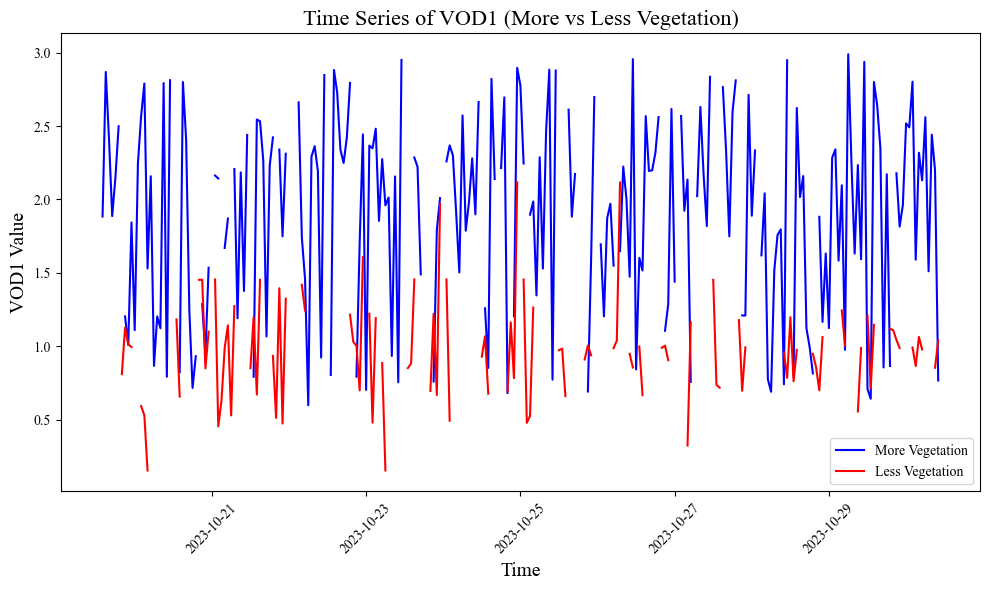

In [21]:

#diurnal cycle of VOD1- more v less veg
#reset index
vod_anom_subset_moreveg_reset = vod_anom_subset_moreveg.reset_index()
vod_anom_subset_lessveg_reset = vod_anom_subset_lessveg.reset_index()
#epoch to date time
vod_anom_subset_moreveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_moreveg_reset['Epoch'])
vod_anom_subset_lessveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_lessveg_reset['Epoch'])
#local hr
vod_anom_subset_moreveg_reset['Epoch'] = vod_anom_subset_moreveg_reset['Epoch'] + timedelta(hours=-5)
vod_anom_subset_lessveg_reset['Epoch'] = vod_anom_subset_lessveg_reset['Epoch'] + timedelta(hours=-5)
#reset index
vod_anom_subset_moreveg_reset.set_index('Epoch', inplace=True)
vod_anom_subset_lessveg_reset.set_index('Epoch', inplace=True)
#numeric values
vod_numeric_moreveg = vod_anom_subset_moreveg_reset[['VOD1_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_numeric_lessveg = vod_anom_subset_lessveg_reset[['VOD1_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
#hourly avg resampling
vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()
#plotting
plt.figure(figsize=(10, 6))
plt.plot(vod_hourly_mean_moreveg.index, vod_hourly_mean_moreveg['VOD1_mean'], label='More Vegetation', color='blue')
plt.plot(vod_hourly_mean_lessveg.index, vod_hourly_mean_lessveg['VOD1_mean'], label='Less Vegetation', color='red')
plt.xlabel('Time', fontsize=14)
plt.ylabel('VOD1 Value', fontsize=14)
plt.title('Time Series of VOD1 (More vs Less Vegetation)', fontsize=16)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/2912775451.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/2912775451.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()


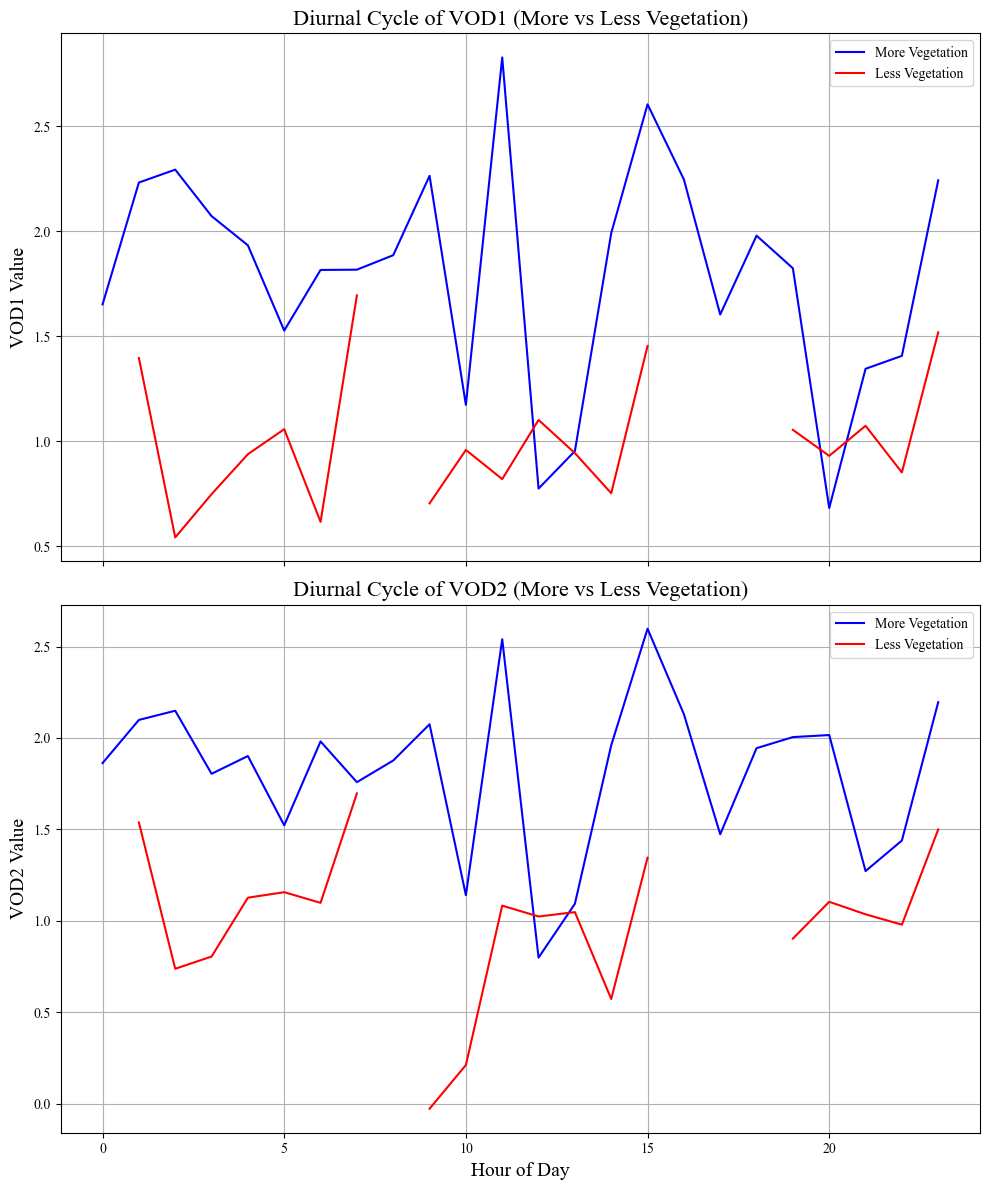

In [22]:
#diurnal cycle of VOD1- more v less veg
vod_anom_subset_moreveg_reset = vod_anom_subset_moreveg.reset_index()
vod_anom_subset_lessveg_reset = vod_anom_subset_lessveg.reset_index()
vod_anom_subset_moreveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_moreveg_reset['Epoch'])
vod_anom_subset_lessveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_lessveg_reset['Epoch'])

#local pr time
vod_anom_subset_moreveg_reset['Epoch'] = vod_anom_subset_moreveg_reset['Epoch'] + timedelta(hours=-5)
vod_anom_subset_lessveg_reset['Epoch'] = vod_anom_subset_lessveg_reset['Epoch'] + timedelta(hours=-5)
vod_anom_subset_moreveg_reset.set_index('Epoch', inplace=True)
vod_anom_subset_lessveg_reset.set_index('Epoch', inplace=True)

# removing non-numeric values and interpolating NaN values
vod_numeric_moreveg = vod_anom_subset_moreveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_numeric_lessveg = vod_anom_subset_lessveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()
vod_hourly_mean_moreveg['hour'] = vod_hourly_mean_moreveg.index.hour
vod_hourly_mean_lessveg['hour'] = vod_hourly_mean_lessveg.index.hour


vod_diurnal_moreveg = vod_hourly_mean_moreveg.groupby('hour').mean()
vod_diurnal_lessveg = vod_hourly_mean_lessveg.groupby('hour').mean()
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot VOD1 for more and less vegetation over 24 hours
axs[0].plot(vod_diurnal_moreveg.index, vod_diurnal_moreveg['VOD1_mean'], label='More Vegetation', color='blue')
axs[0].plot(vod_diurnal_lessveg.index, vod_diurnal_lessveg['VOD1_mean'], label='Less Vegetation', color='red')
#
axs[0].set_ylabel('VOD1 Value', fontsize=14)
axs[0].set_title('Diurnal Cycle of VOD1 (More vs Less Vegetation)', fontsize=16)
axs[0].legend()
axs[0].grid(True)
axs[1].plot(vod_diurnal_moreveg.index, vod_diurnal_moreveg['VOD2_mean'], label='More Vegetation', color='blue')
axs[1].plot(vod_diurnal_lessveg.index, vod_diurnal_lessveg['VOD2_mean'], label='Less Vegetation', color='red')
axs[1].set_xlabel('Hour of Day', fontsize=14)
axs[1].set_ylabel('VOD2 Value', fontsize=14)
axs[1].set_title('Diurnal Cycle of VOD2 (More vs Less Vegetation)', fontsize=16)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()

plt.show()


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/942154867.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  precipitation_4hr = precipitation_data.resample('8H').sum()  # Summing precipitation over every 8-hour period
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/942154867.py:44: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/942154867.py:45: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()


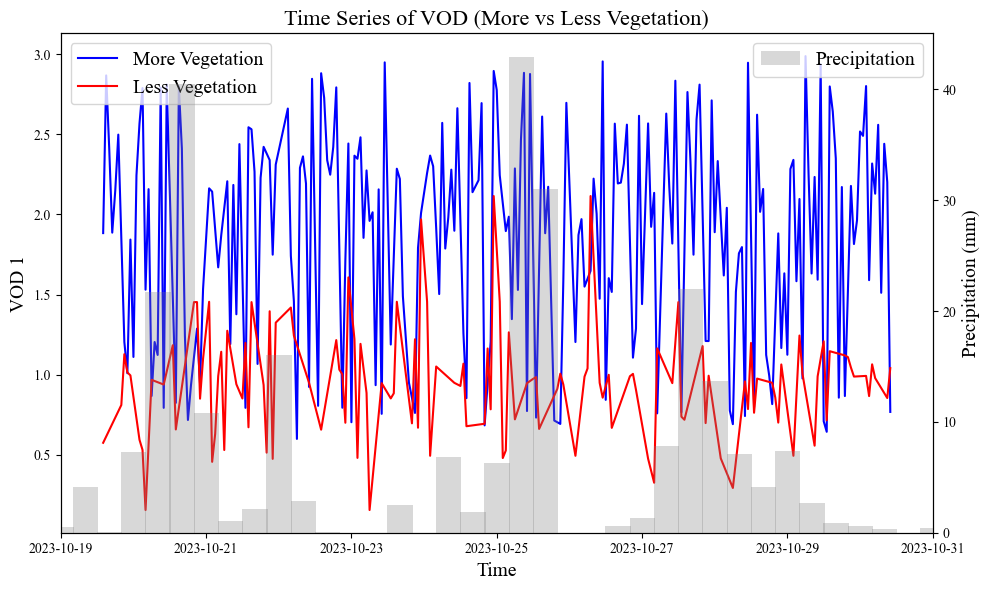

In [23]:
#overlaying more and less vegetation with precipitation

plt.rcParams["font.family"] = "Times New Roman"

precipitation_data = pd.read_csv('/Volumes/coraldelmar/AGU/Precip.csv')  
precipitation_data['Timestamp'] = pd.to_datetime(
    precipitation_data['Timestamp'], 
    format='%d/%m/%Y %H:%M',  
    dayfirst=True            
)

# resample Precipitation data to 8-hour totals
precipitation_data.set_index('Timestamp', inplace=True)
precipitation_4hr = precipitation_data.resample('8H').sum() 
vod_anom_subset_moreveg_reset = vod_anom_subset_moreveg.reset_index()
vod_anom_subset_lessveg_reset = vod_anom_subset_lessveg.reset_index()
vod_anom_subset_moreveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_moreveg_reset['Epoch'])
vod_anom_subset_lessveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_lessveg_reset['Epoch'])

# pr time
vod_anom_subset_moreveg_reset['Epoch'] = vod_anom_subset_moreveg_reset['Epoch'] + timedelta(hours=-5)
vod_anom_subset_lessveg_reset['Epoch'] = vod_anom_subset_lessveg_reset['Epoch'] + timedelta(hours=-5)

# resetepoch index
vod_anom_subset_moreveg_reset.set_index('Epoch', inplace=True)
vod_anom_subset_lessveg_reset.set_index('Epoch', inplace=True)
vod_numeric_moreveg = vod_anom_subset_moreveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_numeric_lessveg = vod_anom_subset_lessveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()

# resampling for hourly avgs
vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()

#plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

vod_hourly_mean_lessveg = vod_hourly_mean_lessveg.dropna()
vod_hourly_mean_moreveg = vod_hourly_mean_moreveg.dropna()
ax1.plot(vod_hourly_mean_moreveg.index, vod_hourly_mean_moreveg['VOD1_mean'], label='More Vegetation', color='blue')
ax1.plot(vod_hourly_mean_lessveg.index, vod_hourly_mean_lessveg['VOD1_mean'], label='Less Vegetation', color='red')

# 
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('VOD 1', fontsize=14)
ax1.set_title('Time Series of VOD (More vs Less Vegetation)', fontsize=16)
legend_ax1 = ax1.legend(loc='upper left', fontsize=14, frameon=True)
legend_ax1.set_zorder(10)
ax1.grid(False)
ax2 = ax1.twinx()
#  resampled to 8-hour totals precipitation 
bar_width = 0.35  
shift = 0.1  

# 
for i, x in enumerate(precipitation_4hr.index):
    ax2.bar(x + timedelta(hours=shift), 
            precipitation_4hr['Rain_mm_Tot'].iloc[i], 
            width=bar_width, 
            alpha=0.3, 
            color='gray', 
            label='Precipitation' if i == 0 else "")
ax2.set_ylabel('Precipitation (mm)', fontsize=14)
legend_ax2 = ax2.legend(loc='upper right', fontsize=14, frameon=True)
legend_ax2.set_zorder(10)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))  
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
ax1.set_xlim(pd.Timestamp('2023-10-19'), pd.Timestamp('2023-10-31'))
plt.tight_layout()
plt.show()



In [ ]:
zentra=pd.read_csv('/Volumes/coraldelmar/coffe_zentra.csv')


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/3140440401.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_moreveg['VOD1_mean_MA'] = vod_hourly_mean_moreveg['VOD1_mean'].rolling('24H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/3140440401.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_lessveg['VOD1_mean_MA'] = vod_hourly_mean_lessveg['VOD1_mean'].rolling('24H').mean()


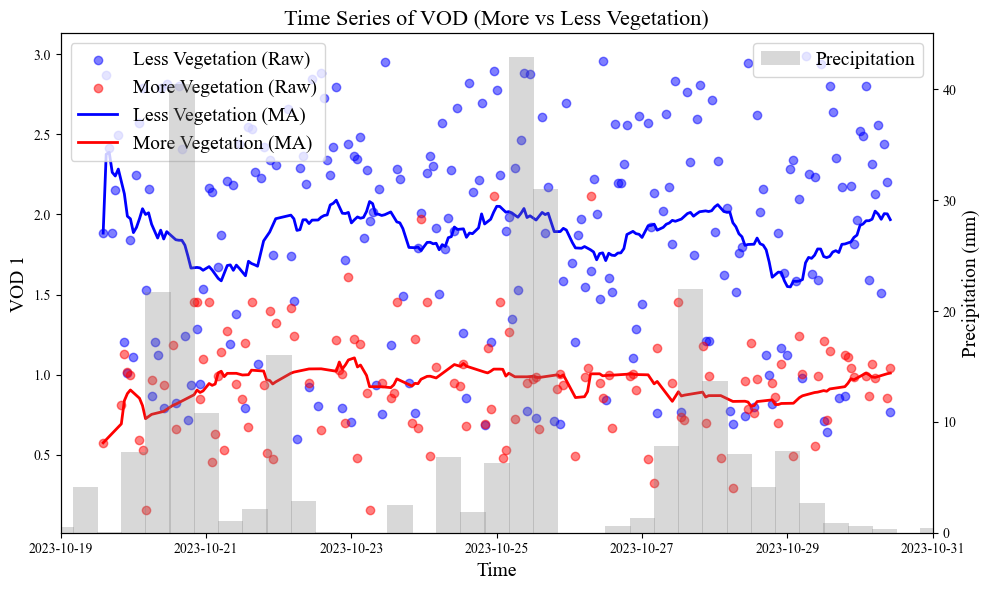

In [24]:
#as scatter plot with mnoving average
plt.rcParams["font.family"] = "Times New Roman"

vod_hourly_mean_moreveg['VOD1_mean_MA'] = vod_hourly_mean_moreveg['VOD1_mean'].rolling('24H').mean()
vod_hourly_mean_lessveg['VOD1_mean_MA'] = vod_hourly_mean_lessveg['VOD1_mean'].rolling('24H').mean()

#
fig, ax1 = plt.subplots(figsize=(10, 6))

# raw
ax1.scatter(
    vod_hourly_mean_moreveg.index, 
    vod_hourly_mean_moreveg['VOD1_mean'], 
    label='Less Vegetation (Raw)', 
    color='blue', 
    alpha=0.5
)
ax1.scatter(
    vod_hourly_mean_lessveg.index, 
    vod_hourly_mean_lessveg['VOD1_mean'], 
    label='More Vegetation (Raw)', 
    color='red', 
    alpha=0.5
)
#moving avgs
ax1.plot(
    vod_hourly_mean_moreveg.index, 
    vod_hourly_mean_moreveg['VOD1_mean_MA'], 
    label='Less Vegetation (MA)', 
    color='blue', 
    linewidth=2
)
ax1.plot(
    vod_hourly_mean_lessveg.index, 
    vod_hourly_mean_lessveg['VOD1_mean_MA'], 
    label='More Vegetation (MA)', 
    color='red', 
    linewidth=2
)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('VOD 1', fontsize=14)
ax1.set_title('Time Series of VOD (More vs Less Vegetation)', fontsize=16)
legend_ax1 = ax1.legend(loc='upper left', fontsize=14, frameon=True)
legend_ax1.set_zorder(10)
ax1.grid(False)
ax2 = ax1.twinx()

#  precipitation bars- shifting and bar width to prevent overlap
bar_width = 0.35  
shift = 0.1  
for i, x in enumerate(precipitation_4hr.index):
    ax2.bar(
        x + timedelta(hours=shift), 
        precipitation_4hr['Rain_mm_Tot'].iloc[i], 
        width=bar_width, 
        alpha=0.3, 
        color='gray', 
        label='Precipitation' if i == 0 else ""  
    )

# 
ax2.set_ylabel('Precipitation (mm)', fontsize=14)
legend_ax2 = ax2.legend(loc='upper right', fontsize=14, frameon=True)
legend_ax2.set_zorder(10)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))  
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.xticks(rotation=45)
ax1.set_xlim(pd.Timestamp('2023-10-19'), pd.Timestamp('2023-10-31'))
plt.tight_layout()
plt.show()


In [19]:
newdf=hemi.add_CellID(df)
newdf

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gnssvod/hemistats/hemistats.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idf=idf.groupby('eleind',group_keys=False).apply(azicut) # groupby will drop rows with eleind=NaN
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gnssvod/hemistats/hemistats.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iele = idf.eleind[0]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gnssvod/hemistats/hemistats.py:80: FutureWarning: Series.__getitem__ treating keys as positions is 

S1C  S1X   S2C  S2X  Azimuth  Elevation  \
Station     Epoch               SV                                              
MACROCOSM-2 2023-10-05 14:48:45 G05  33.0  NaN   NaN  NaN     59.5       32.8   
                                G13  31.0  NaN   NaN  NaN     30.2       31.7   
                                G15  39.0  NaN   NaN  NaN     -9.8       57.2   
                                G18  42.0  NaN   NaN  NaN    -32.8       36.7   
                                G24  37.0  NaN   NaN  NaN    158.6       56.4   
...                                   ...  ...   ...  ...      ...        ...   
MACROCOSM-5 2024-05-13 03:30:00 R11  34.5  NaN  28.9  NaN     29.2       18.6   
                                R12  47.1  NaN  42.0  NaN     70.2       75.0   
                                R13  37.0  NaN  36.1  NaN   -167.5       47.8   
                                R17  37.0  NaN  28.0  NaN    -91.9       14.6   
                                R18   NaN  NaN  25.9  NaN    -48.6        2.5   

                                     CellID  
Station     Epoch               SV           
MACROCOSM-2 2023-10-05 14:48:45 G05    3021  
                                G13    3005  
                                G15    1055  
                                G18    2782  
                                G24    1115  
...                                     ...  
MACROCOSM-5 2024-05-13 03:30:00 R11    4442  
                                R12     236  
                                R13    1691  
                                R17    5028  
                                R18    6417  

[11125872 rows x 7 columns]

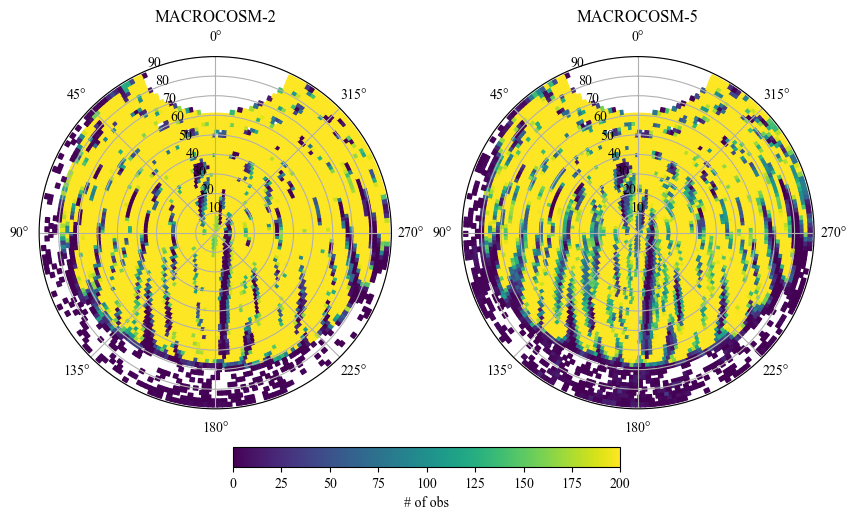

In [20]:
# number of observations 
##could be patched into larger averages using hemibuild
hemi_count = newdf.groupby(['CellID','Station']).count()
hemi_count

fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_count.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([0,200])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='# of obs')